
# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:180%;text-align:center;border-radius:20px 60px;"> [Title: Report on Global Power Plant]()</p>




 # <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:180%;text-align:center;border-radius:20px 60px;"> [ Table of Contents]()</p>

1.	 Introduction

1.1	 Importing Libraries

1.2    Loadinding Data

2.	Data Preparation and Exploratory Data Analysis (EDA)

2.1	Data Cleaning

2.2     Statistics Summary

2.3     Data Type

2.4    Numerical Feature Analysis and Outliers Plotting Using Boxplot

2.5    Correlation Analysis

2.6    Categorical Features Analysis

2.7     Relationship Numerical and Categorical Features(Capacity_MW vs Fuel Type)

3.	Research Questions and Integration of Domain Knowledge

3.1	  What are the trends in the capacity and generation of power plants across countries over time ?

3.2.  	What are the relationship between fuel type and power generation ?
3.3.    Are their spatial distribution of power plants and their capacities ?
4.	Findings
5.	Conclusions


    
   
   
    
    


# <p style="background-color:#6c617d;font-family:newtimeroman;color:#D5CABD;font-size:180%;text-align:center;border-radius:20px 60px;"> [Introduction]()</p>


Energy systems are the backbone of modern society, enabling economic growth, technological advancements, and improved living standards. A power sector that is affordable, reliable, and environmentally sustainable is essential to meet the growing energy demands of an increasingly interconnected and urbanized world. Decisions by governments, utilities, and private companies significantly influence the trajectory of the power sector, impacting economic development, environmental health, and societal equity. For instance, the implementation of carbon pricing can drastically alter the operations of power plants, shaping the electricity generation mix, system reliability, and emissions profile over time. Power plants are not only critical for electricity generation but also play a pivotal role in addressing some of the world’s most pressing challenges, such as climate change, water resource management, and air quality improvement.  
Power plants contribute significantly to global CO₂ emissions, with their operations driving climate change through the release of greenhouse gases (GHGs). Additionally, they are major contributors to water stress, consuming large quantities of water for cooling and steam generation, and to air pollution through the emission of sulfur oxides (SOx), nitrogen oxides (NOx), and particulate matter (PM). These challenges necessitate a fundamental transformation of the energy sector, moving away from high-carbon and resource-intensive systems toward clean, sustainable, and resilient energy solutions. Such a transition requires robust datasets, advanced technologies, and a deep understanding of the geographical, social, and economic factors influencing energy production and consumption.  


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [3]:

# Load the dataset
df = pd.read_csv('./Global_Power_Plant.csv')

In [4]:
# view the data

df.head()

country country_long                                               name  \
0     AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
2     AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
3     AFG  Afghanistan  Nangarhar (Darunta) Hydroelectric Power Plant ...   
4     AFG  Afghanistan            Northwest Kabul Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude  fuel1 fuel2 fuel3  ...  \
0  GEODB0040538        33.00   32.3220    65.1190  Hydro   NaN   NaN  ...   
1  GEODB0040541        66.00   34.5560    69.4787  Hydro   NaN   NaN  ...   
2  GEODB0040534       100.00   34.6410    69.7170  Hydro   NaN   NaN  ...   
3  GEODB0040536        11.55   34.4847    70.3633  Hydro   NaN   NaN  ...   
4  GEODB0040540        42.00   34.5638    69.1134    Gas   NaN   NaN  ...   

  owner  source                                 url geolocation_source  \
0   NaN   GEODB  http://globalenergyobservatory.org              GEODB   
1   NaN   GEODB  http://globalenergyobservatory.org              GEODB   
2   NaN   GEODB  http://globalenergyobservatory.org              GEODB   
3   NaN   GEODB  http://globalenergyobservatory.org              GEODB   
4   NaN   GEODB  http://globalenergyobservatory.org              GEODB   

  year_of_capacity_data generation_gwh_2013  generation_gwh_2014  \
0                2017.0                 NaN                  NaN   
1                2017.0                 NaN                  NaN   
2                2017.0                 NaN                  NaN   
3                2017.0                 NaN                  NaN   
4                2017.0                 NaN                  NaN   

   generation_gwh_2015  generation_gwh_2016  estimated_generation_gwh  
0                  NaN                  NaN                       NaN  
1                  NaN                  NaN                       NaN  
2                  NaN                  NaN                       NaN  
3                  NaN                  NaN                       NaN  
4                  NaN                  NaN                       NaN  

[5 rows x 22 columns]

In [5]:
# Total number of values in the data  and print the total number of missing values in the entries

# Total number of values in the DataFrame
total_values = df.size
print(f"Total number of values: {total_values}")

# Total number of missing values
missing_values = df.isnull().sum().sum()
print(f"Total number of missing values: {missing_values}")

Total number of values: 630608
Total number of missing values: 226735


In [6]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 country                         0
country_long                    0
name                           20
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
fuel1                           3
fuel2                       26959
fuel3                       28368
fuel4                       28556
commissioning_year          13712
owner                       10571
source                          0
url                             0
geolocation_source            421
year_of_capacity_data       12519
generation_gwh_2013         28225
generation_gwh_2014         28209
generation_gwh_2015         27706
generation_gwh_2016         20338
estimated_generation_gwh     1128
dtype: int64


In [7]:
# Statistics Summary
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28664 entries, 0 to 28663
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   28664 non-null  object 
 1   country_long              28664 non-null  object 
 2   name                      28644 non-null  object 
 3   gppd_idnr                 28664 non-null  object 
 4   capacity_mw               28664 non-null  float64
 5   latitude                  28664 non-null  float64
 6   longitude                 28664 non-null  float64
 7   fuel1                     28661 non-null  object 
 8   fuel2                     1705 non-null   object 
 9   fuel3                     296 non-null    object 
 10  fuel4                     108 non-null    object 
 11  commissioning_year        14952 non-null  float64
 12  owner                     18093 non-null  object 
 13  source                    28664 non-null  object 
 14  url   

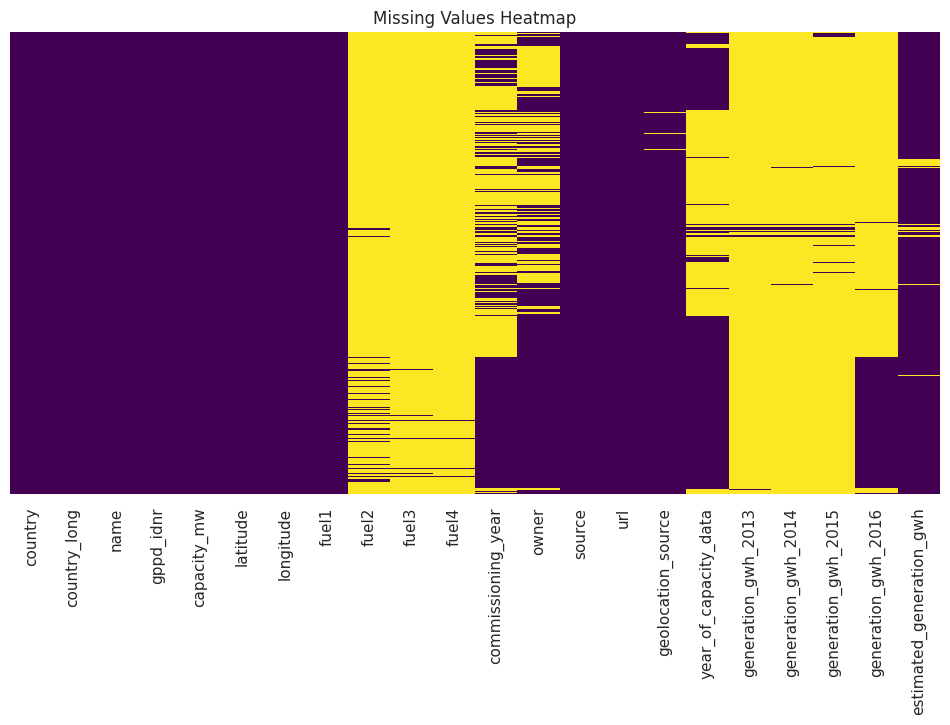

In [8]:
# Visualize Missing Values (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Example: Fill missing 'name' with 'Unknown'
df['name'].fillna('Unknown', inplace=True)

<ipython-input-9-a8c0dabca9c2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)


In [10]:
# Fill missing 'fuel1' values with the mode
df['fuel1'].fillna(df['fuel1'].mode()[0], inplace=True)

<ipython-input-10-7f4f571f98e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel1'].fillna(df['fuel1'].mode()[0], inplace=True)


In [11]:
# Fill missing 'fuel2' values with the mode
df['fuel2'].fillna(df['fuel2'].mode()[0], inplace=True)

<ipython-input-11-fc971a117662>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel2'].fillna(df['fuel2'].mode()[0], inplace=True)


In [12]:
# Fill missing 'fuel3' values with the mode
df['fuel3'].fillna(df['fuel3'].mode()[0], inplace=True)

<ipython-input-12-241d32221c41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel3'].fillna(df['fuel3'].mode()[0], inplace=True)


In [13]:
# Fill missing 'fuel4' values with the mode
df['fuel4'].fillna(df['fuel4'].mode()[0], inplace=True)

<ipython-input-13-51fea5bf5a43>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel4'].fillna(df['fuel4'].mode()[0], inplace=True)


In [14]:
# Fill missing 'commissioning_year' values with the median
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)

<ipython-input-14-37465e835e3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)


In [15]:
# Fill missing 'owner' values with the mode
df['owner'].fillna(df['owner'].mode()[0], inplace=True)

<ipython-input-15-fd54cc4ee98c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owner'].fillna(df['owner'].mode()[0], inplace=True)


In [16]:
# Fill missing 'geolocation_source' values with the mode
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

<ipython-input-16-c2eddc90ec90>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)


In [17]:
# Fill missing 'year_of_capacity_data' values with the median
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(), inplace=True)

<ipython-input-17-9f2729ee6c45>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(), inplace=True)


In [18]:
# Fill missing 'generation_gwh_2013' values with the median
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace=True)

<ipython-input-18-ada5c8cbd663>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace=True)


In [19]:
# Fill missing 'generation_gwh_2014' values with the median
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)

<ipython-input-19-ac301e012ece>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)


In [20]:
# Fill missing 'generation_gwh_2015' values with the median
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)

<ipython-input-20-ef335be549c3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)


In [21]:
# Fill missing 'generation_gwh_2016' values with the median
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)

<ipython-input-21-0f910f4e163b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)


In [22]:
# Fill missing 'estimated_generation_gwh' values with the median
df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].median(), inplace=True)

<ipython-input-22-bfa7f4c6d38a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].median(), inplace=True)


In [23]:
# Missing Value Analysis
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
fuel1                       0
fuel2                       0
fuel3                       0
fuel4                       0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
estimated_generation_gwh    0
dtype: int64


In [24]:
# Total number of values in the data  and print the total number of missing values in the entries

# Total number of values in the DataFrame
total_values = df.size
print(f"Total number of values: {total_values}")

# Total number of missing values
missing_values = df.isnull().sum().sum()
print(f"Total number of missing values: {missing_values}")

Total number of values: 630608
Total number of missing values: 0


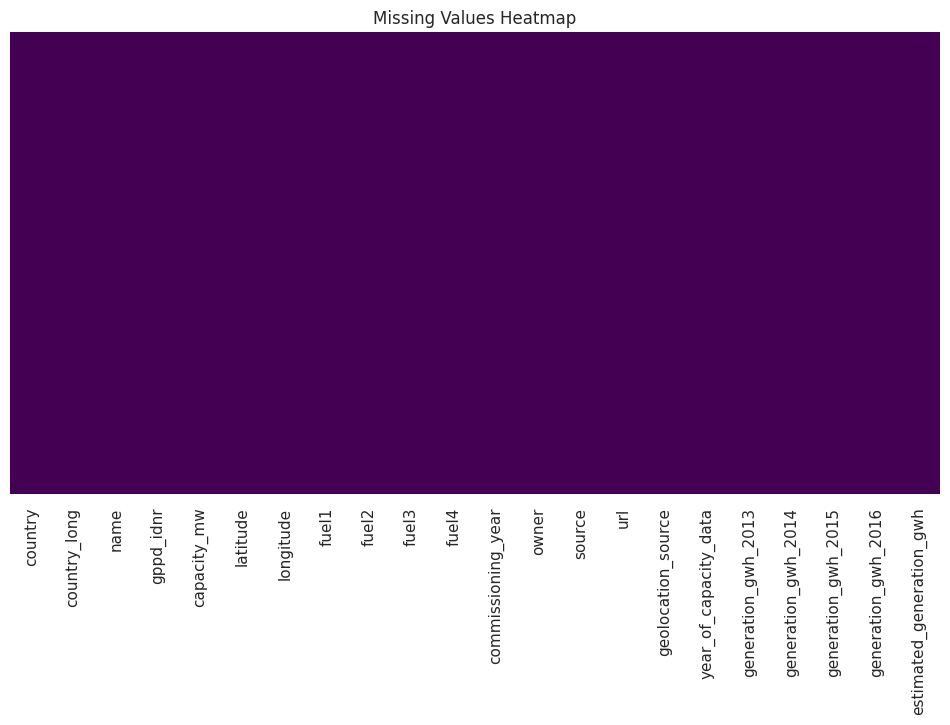

In [25]:
# Visualize Missing Values (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [26]:
# Data types of each column
print(df.dtypes)

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
fuel1                        object
fuel2                        object
fuel3                        object
fuel4                        object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
estimated_generation_gwh    float64
dtype: object


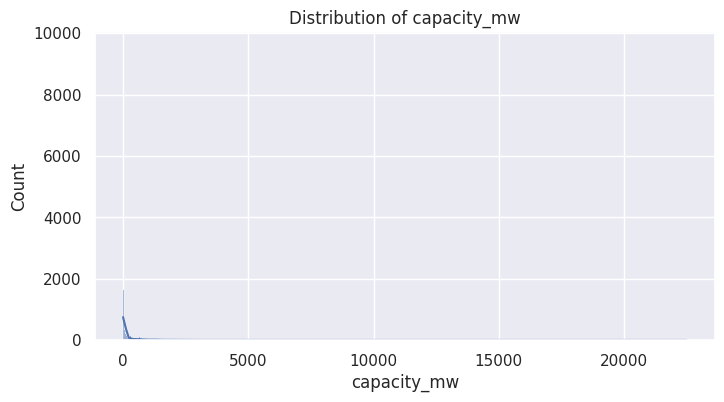

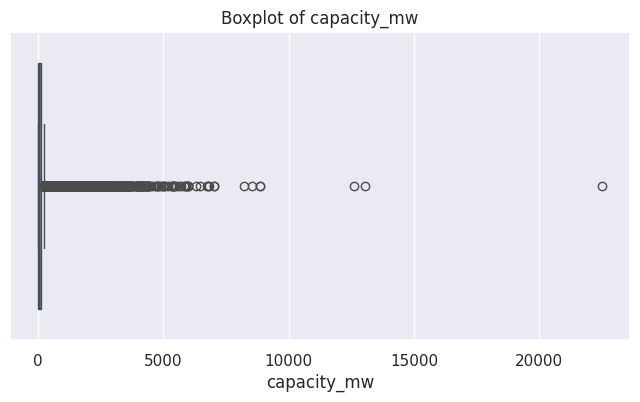

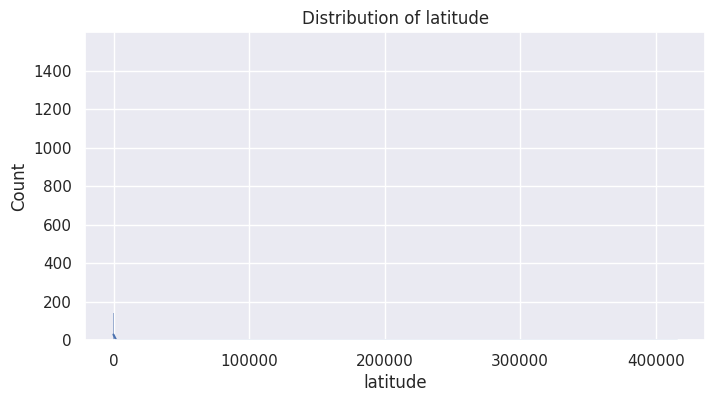

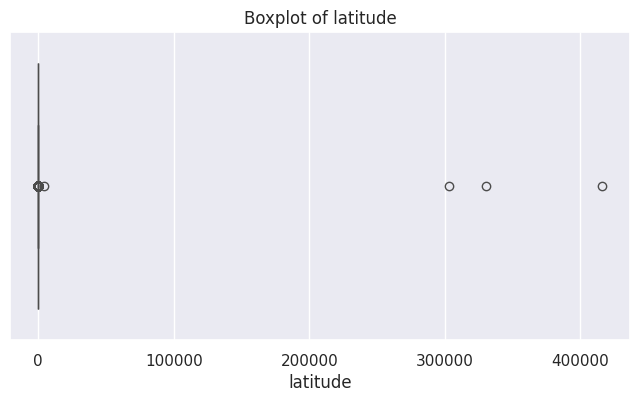

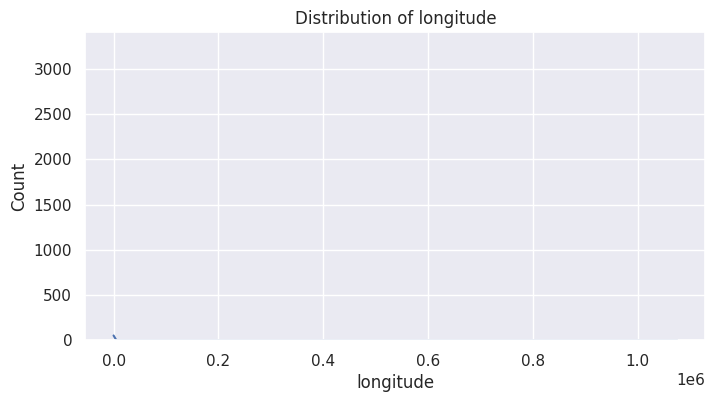

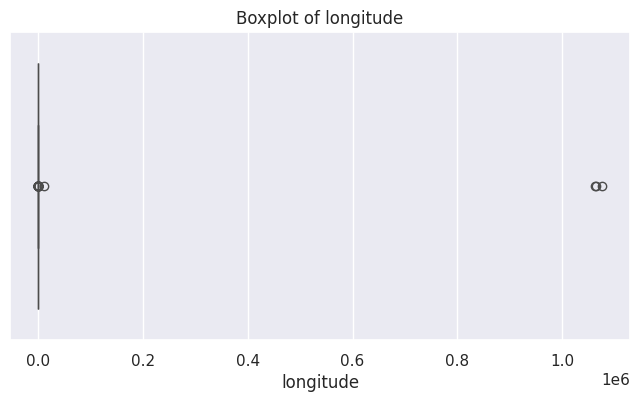

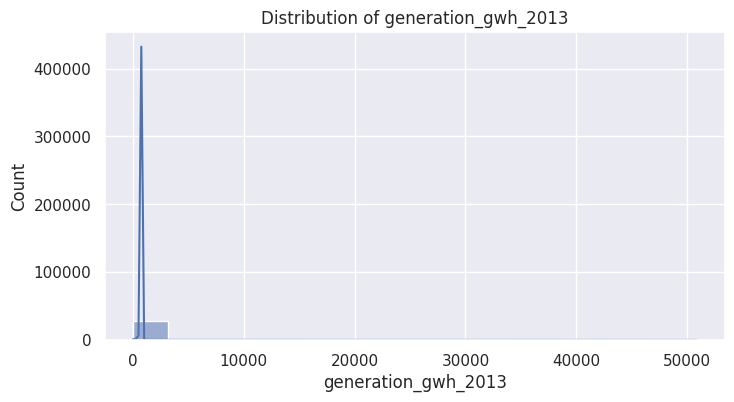

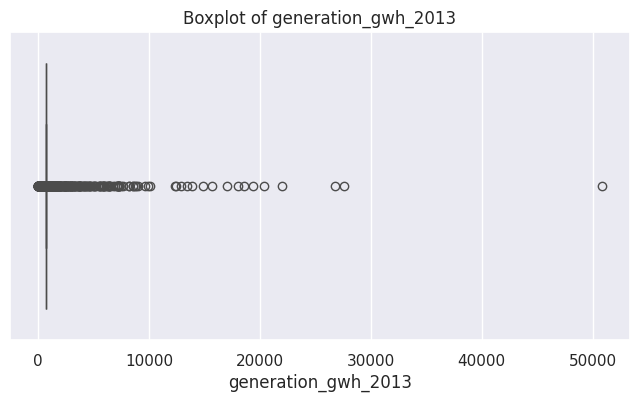

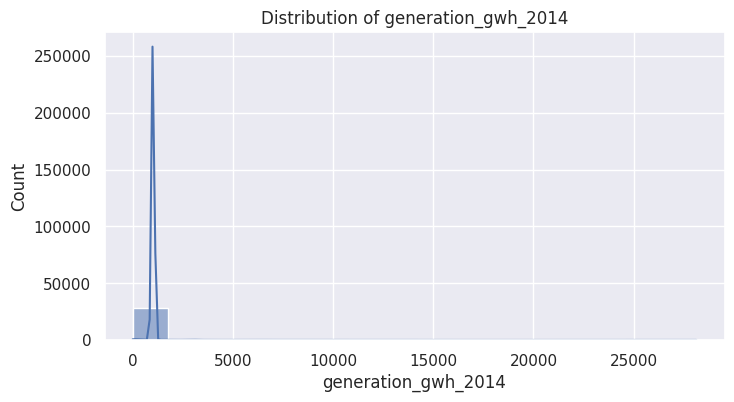

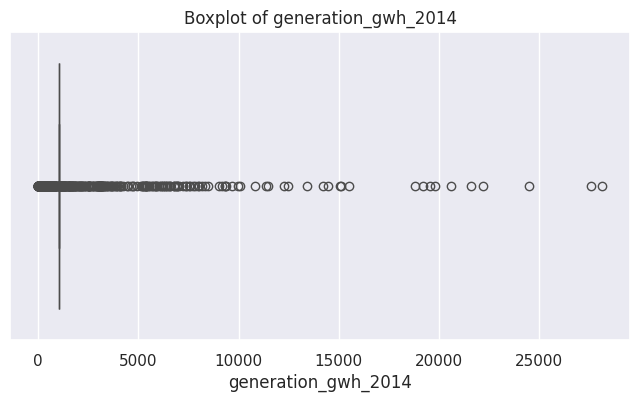

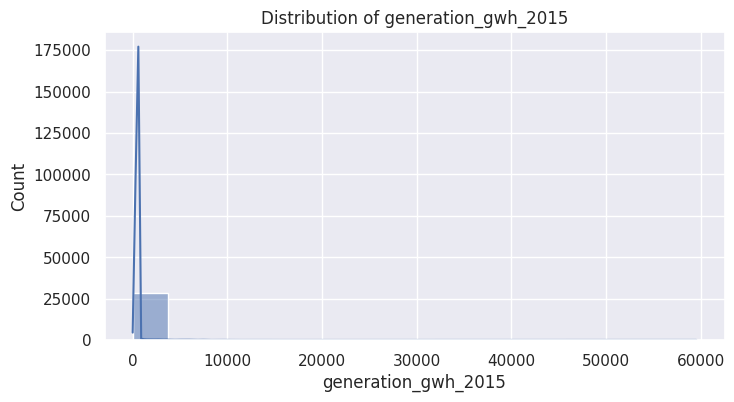

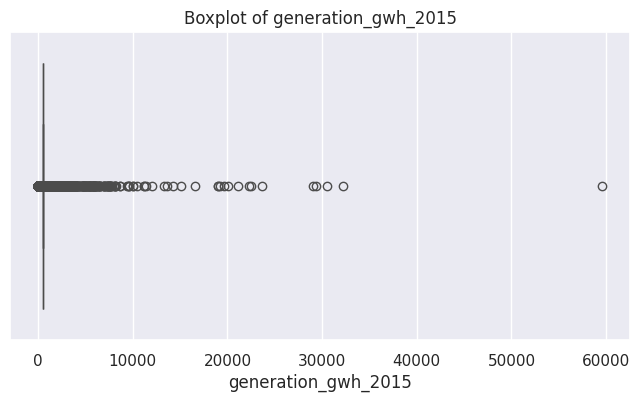

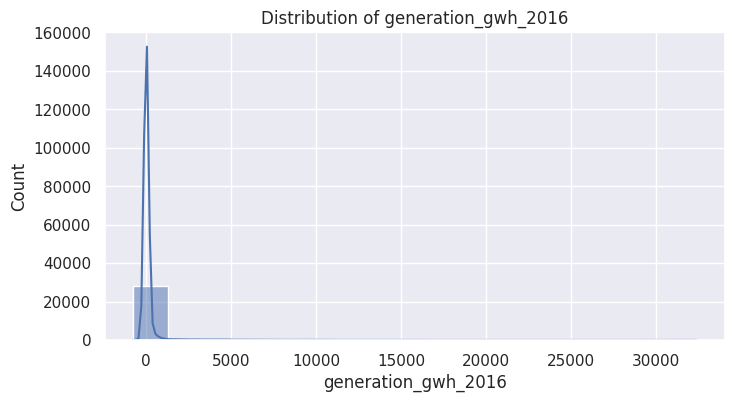

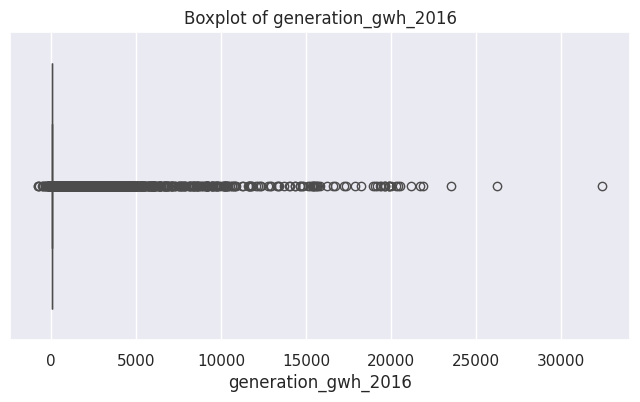

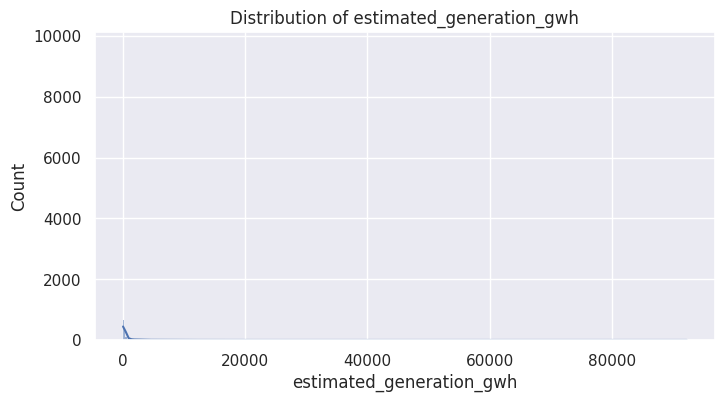

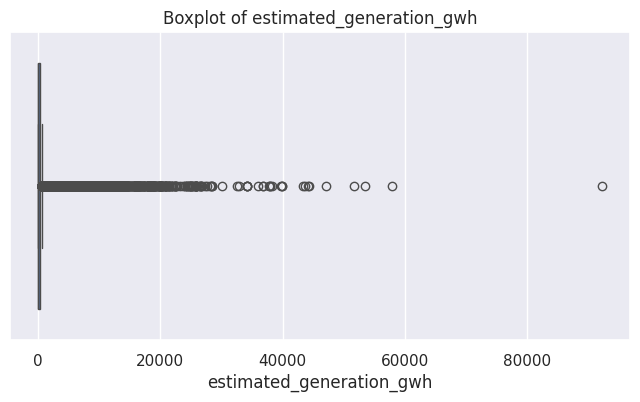

In [27]:
# Numerical Feature Analysis
numerical_cols = ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'estimated_generation_gwh']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

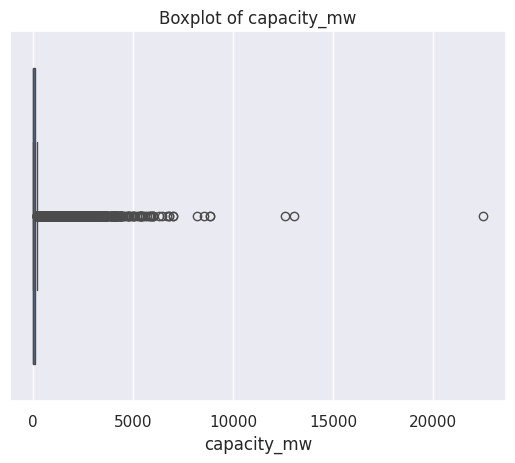

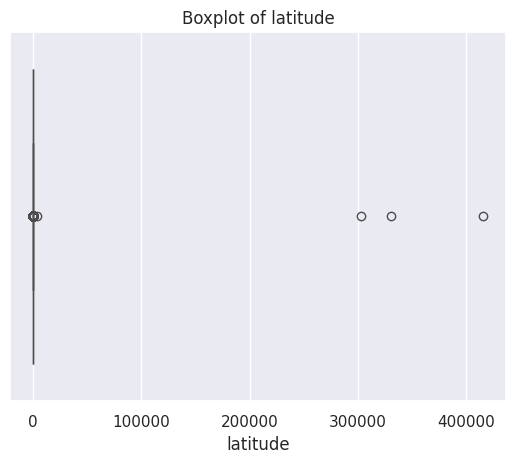

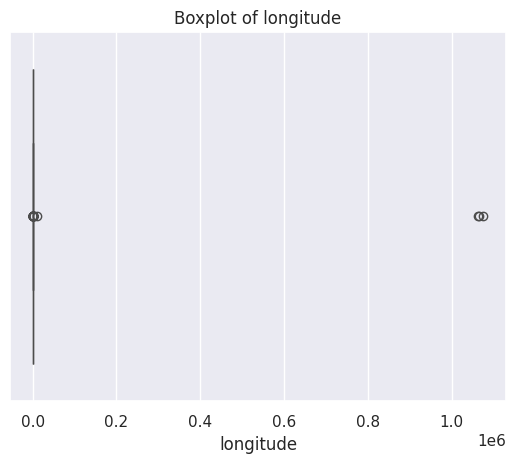

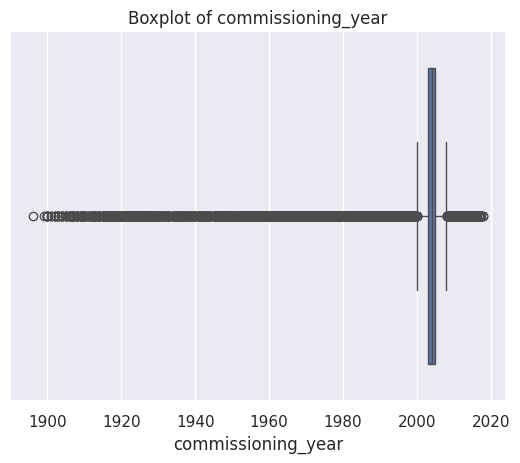

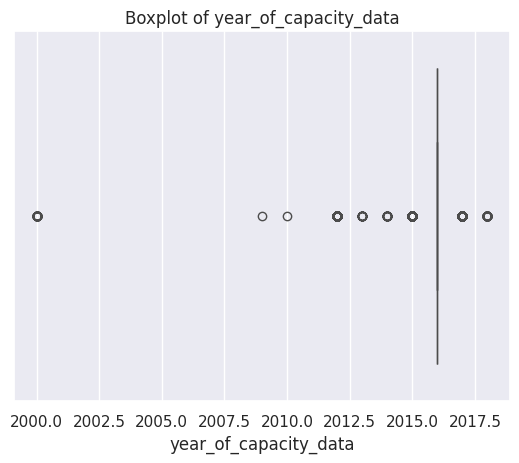

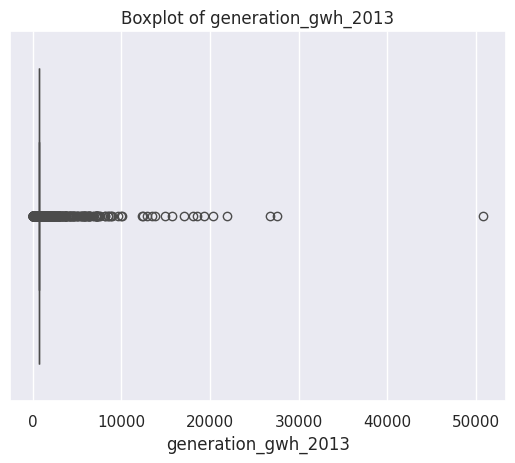

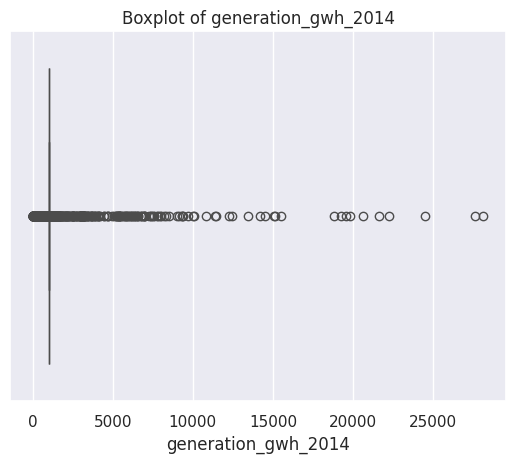

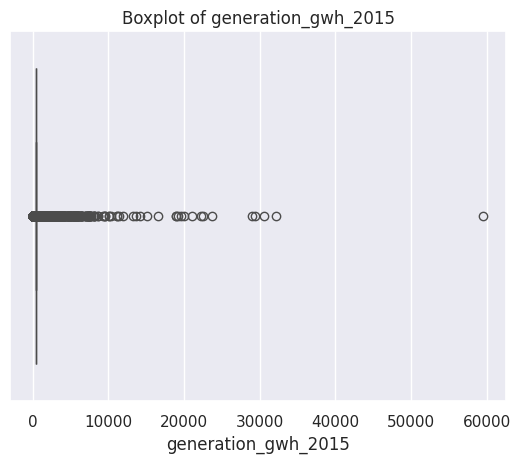

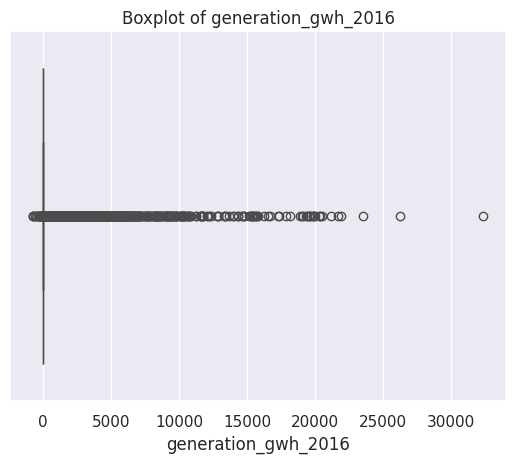

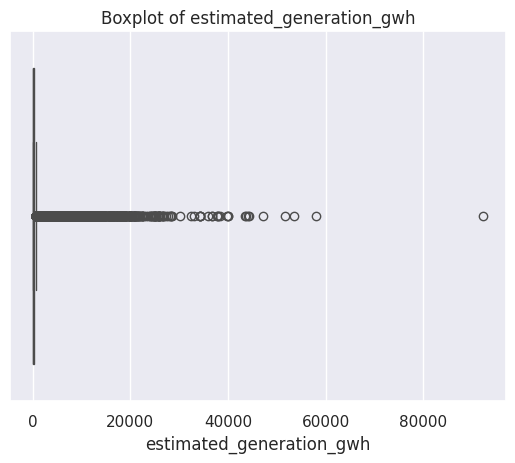

In [28]:
# Look for potential outliers using boxplots
for column in df.select_dtypes(include=np.number):  # Iterate only over numerical columns
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

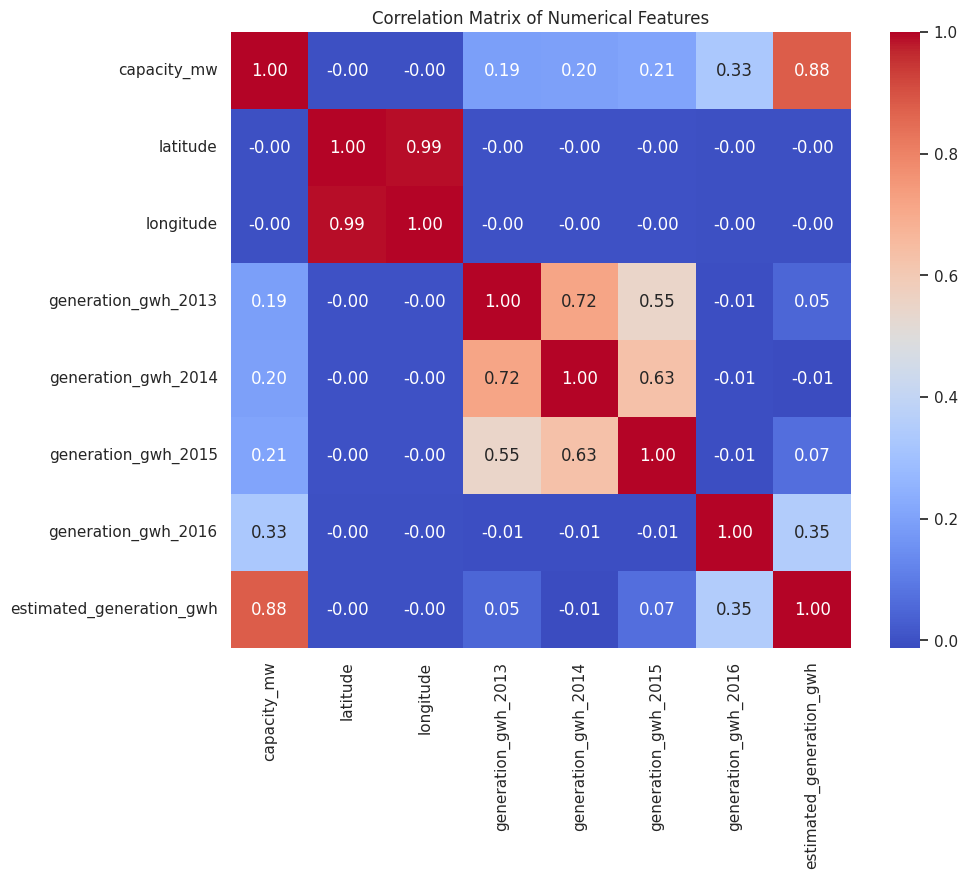

In [29]:
# Correlation Analysis
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Value counts for country:
country
USA    8119
CHN    2901
GBR    2567
BRA    2340
FRA    2018
       ... 
ZWE       2
GNB       1
LSO       1
DJI       1
ESH       1
Name: count, Length: 164, dtype: int64


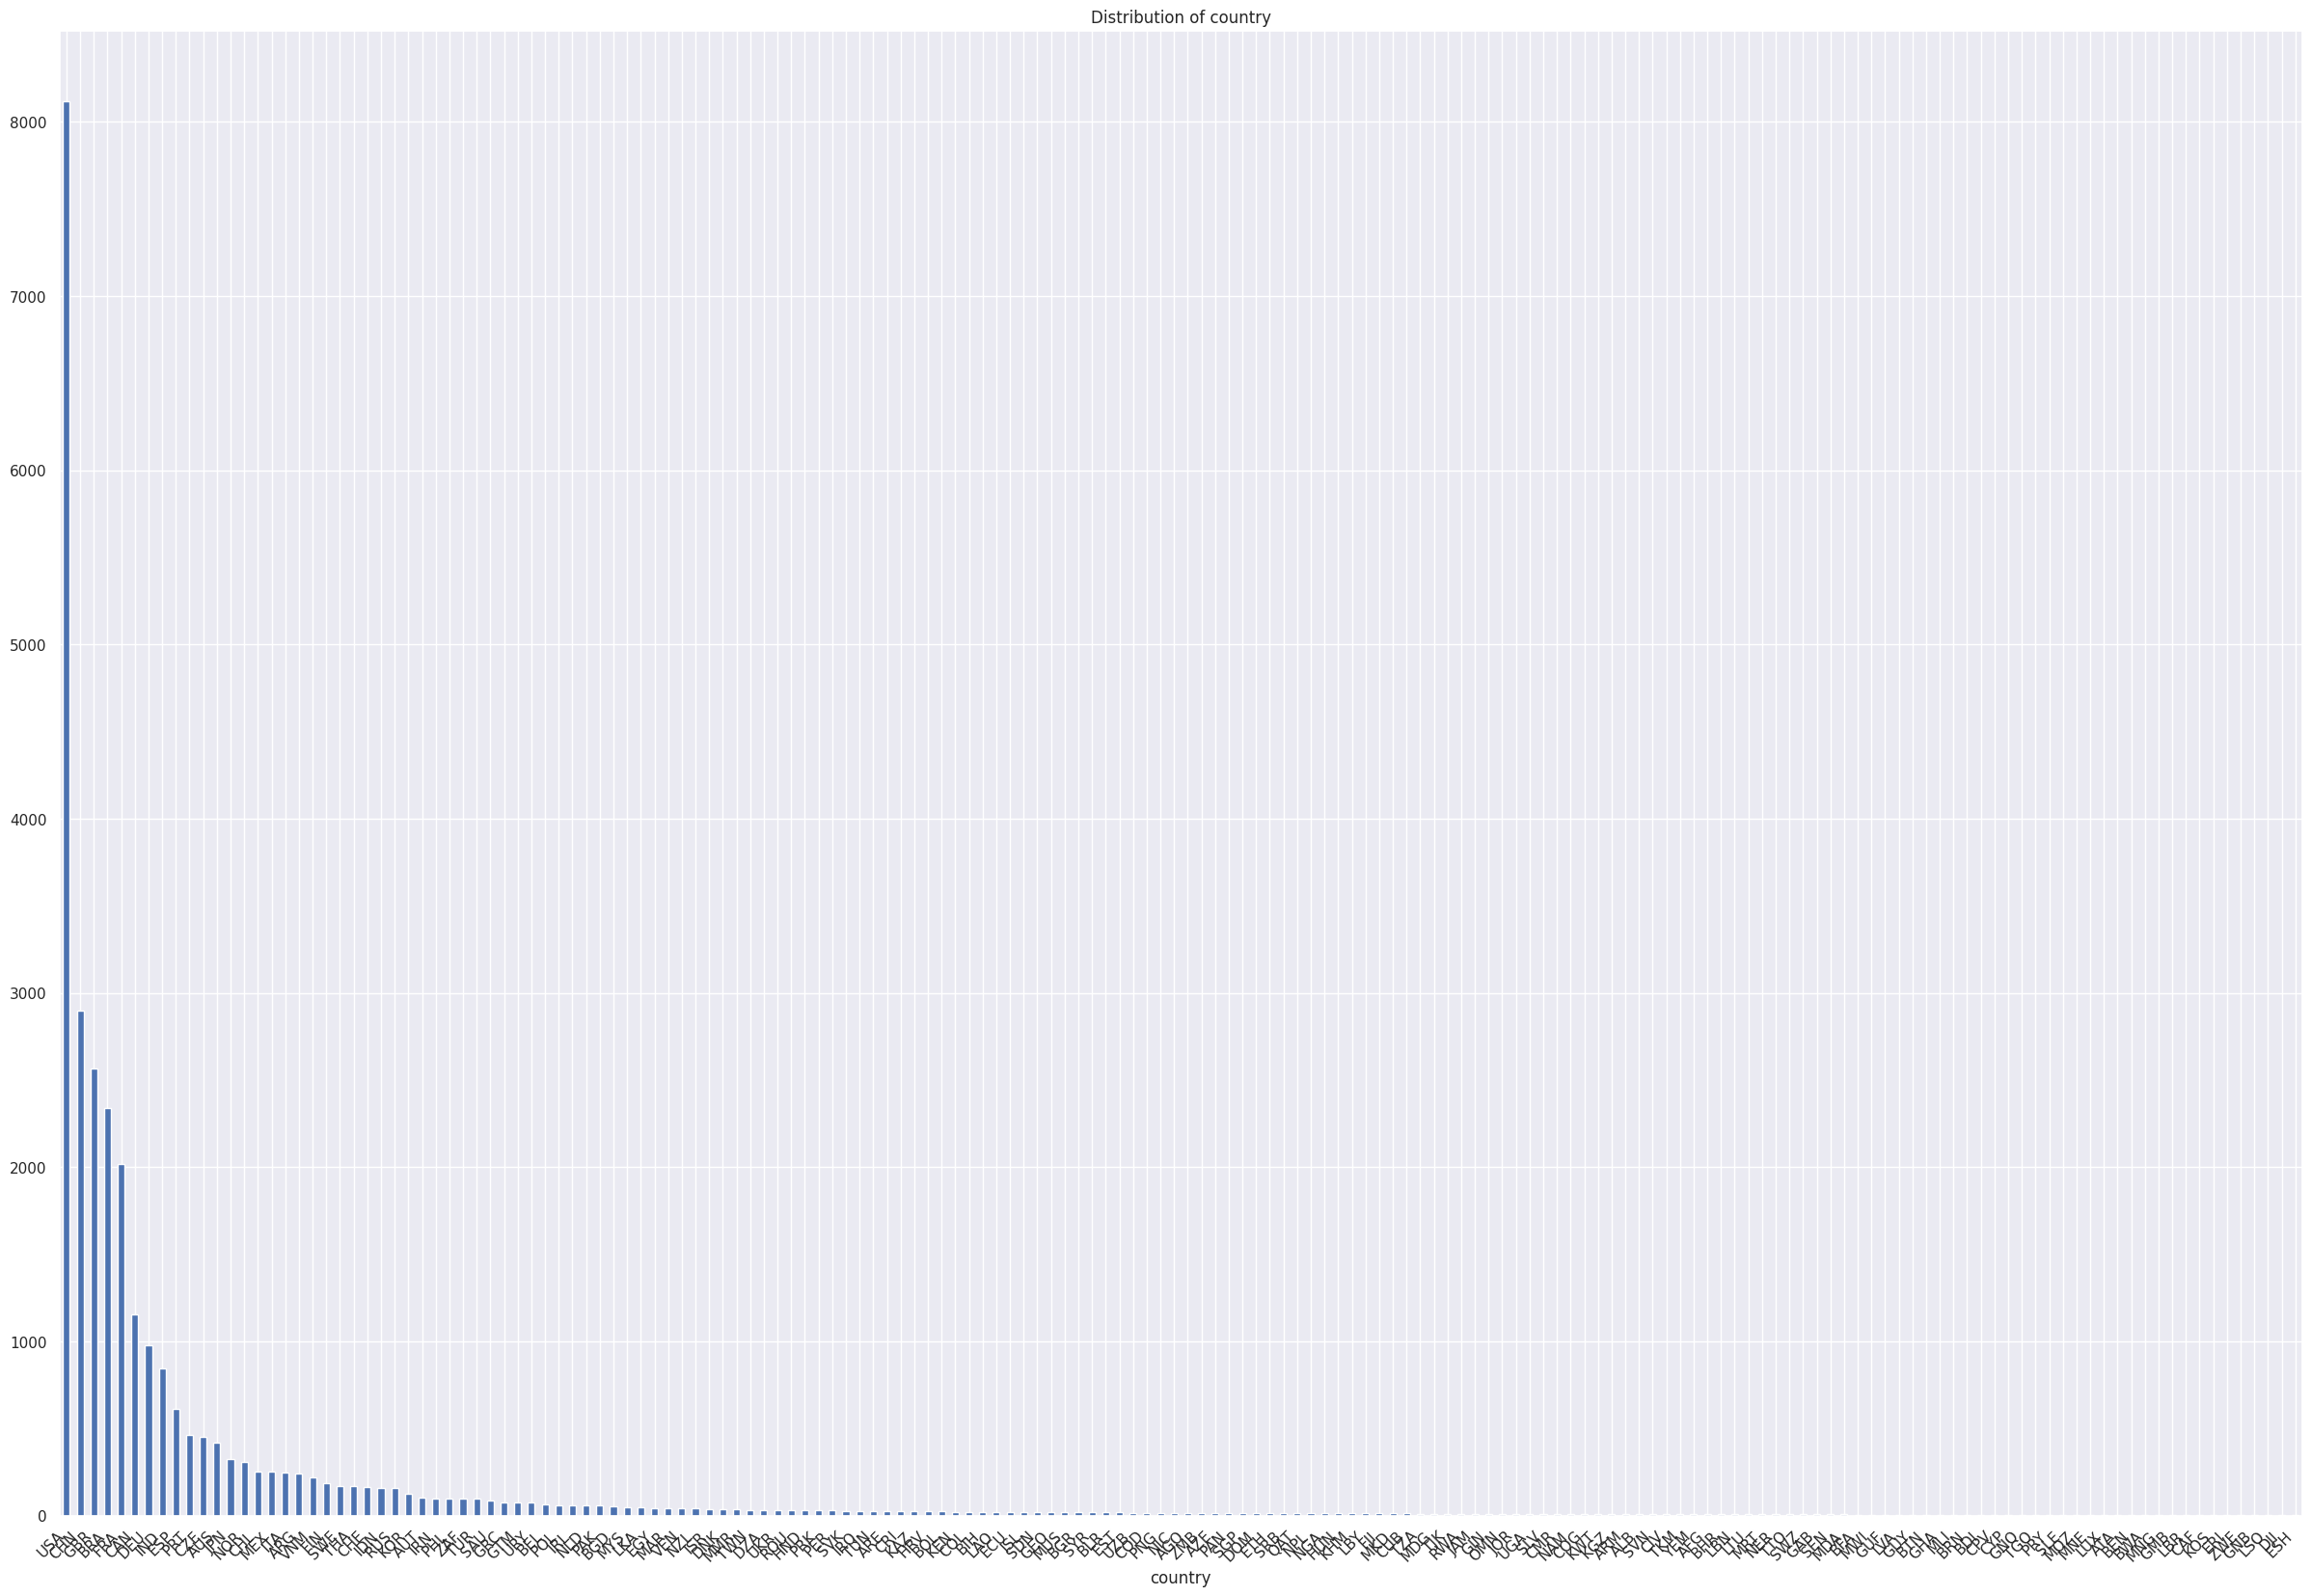


Value counts for fuel1:
fuel1
Hydro             7037
Solar             5424
Wind              5084
Gas               3068
Oil               2925
Coal              2172
Biomass           1290
Waste             1143
Nuclear            199
Geothermal         186
Cogeneration        43
Storage             39
Other               36
Wave and Tidal      10
Petcoke              8
Name: count, dtype: int64


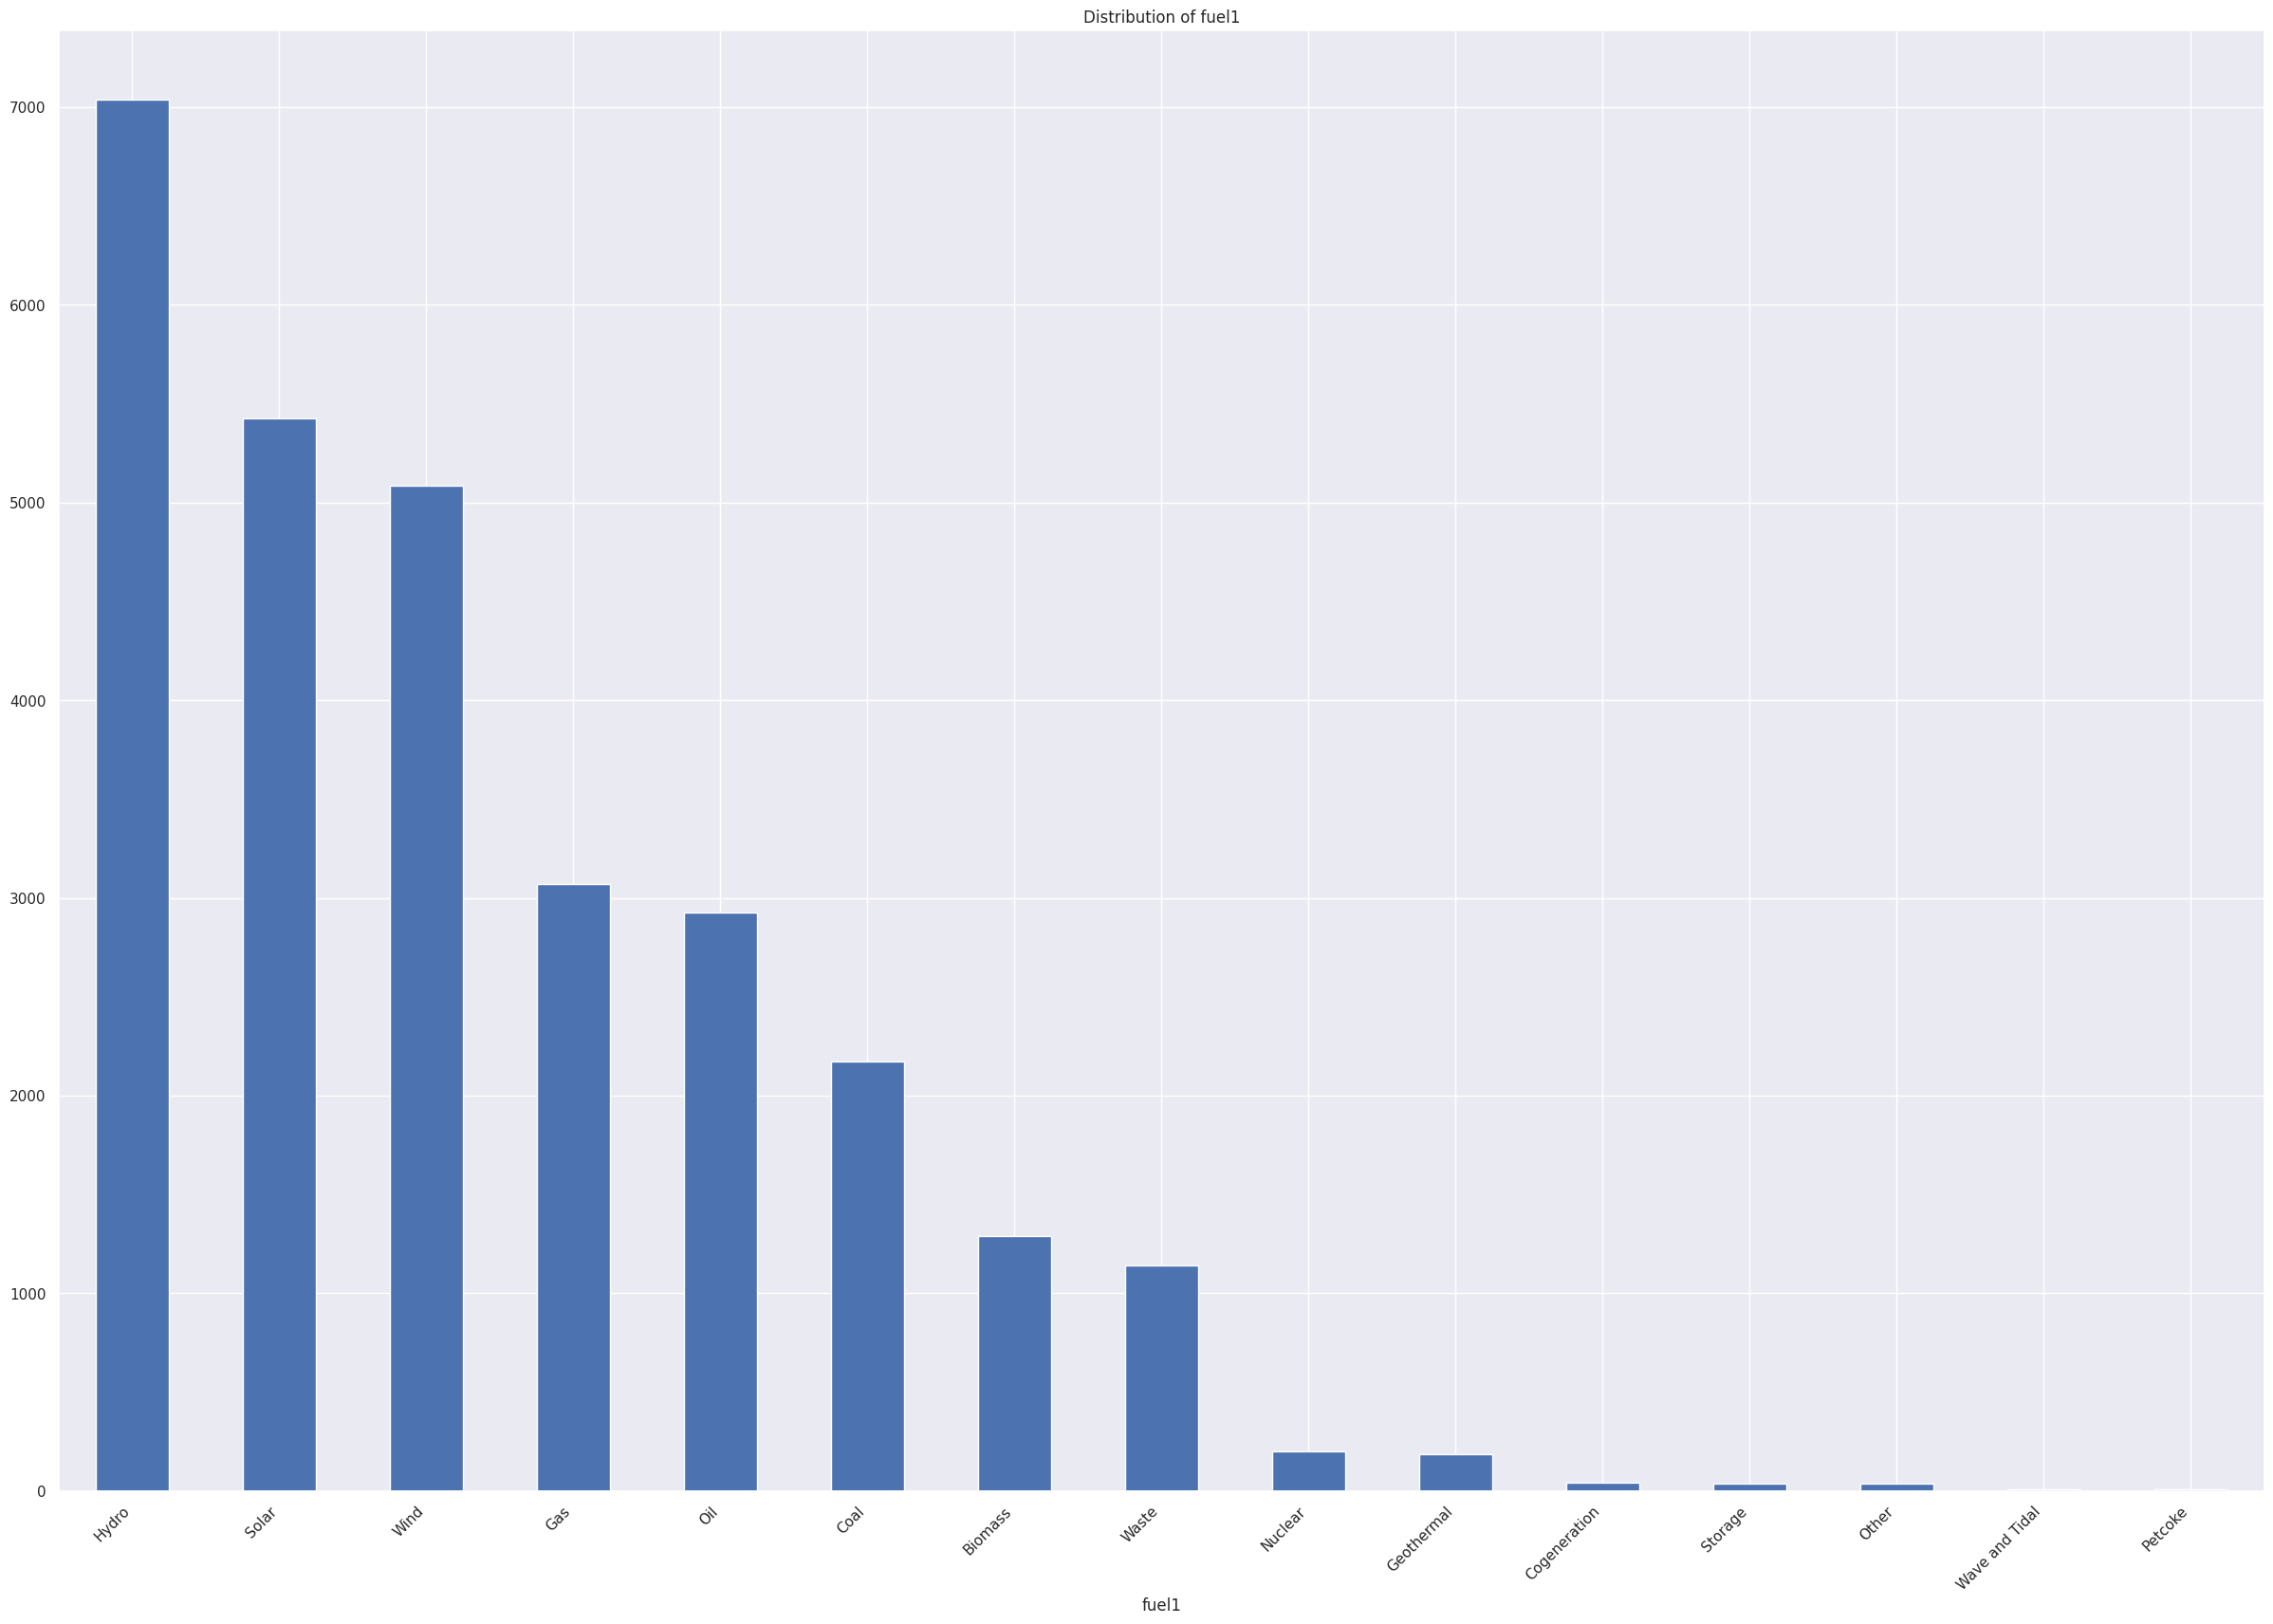


Value counts for fuel2:
fuel2
Gas        27969
Oil          399
Other         62
Biomass       61
Waste         49
Petcoke       28
Hydro         27
Solar         24
Storage       20
Coal          17
Wind           8
Name: count, dtype: int64


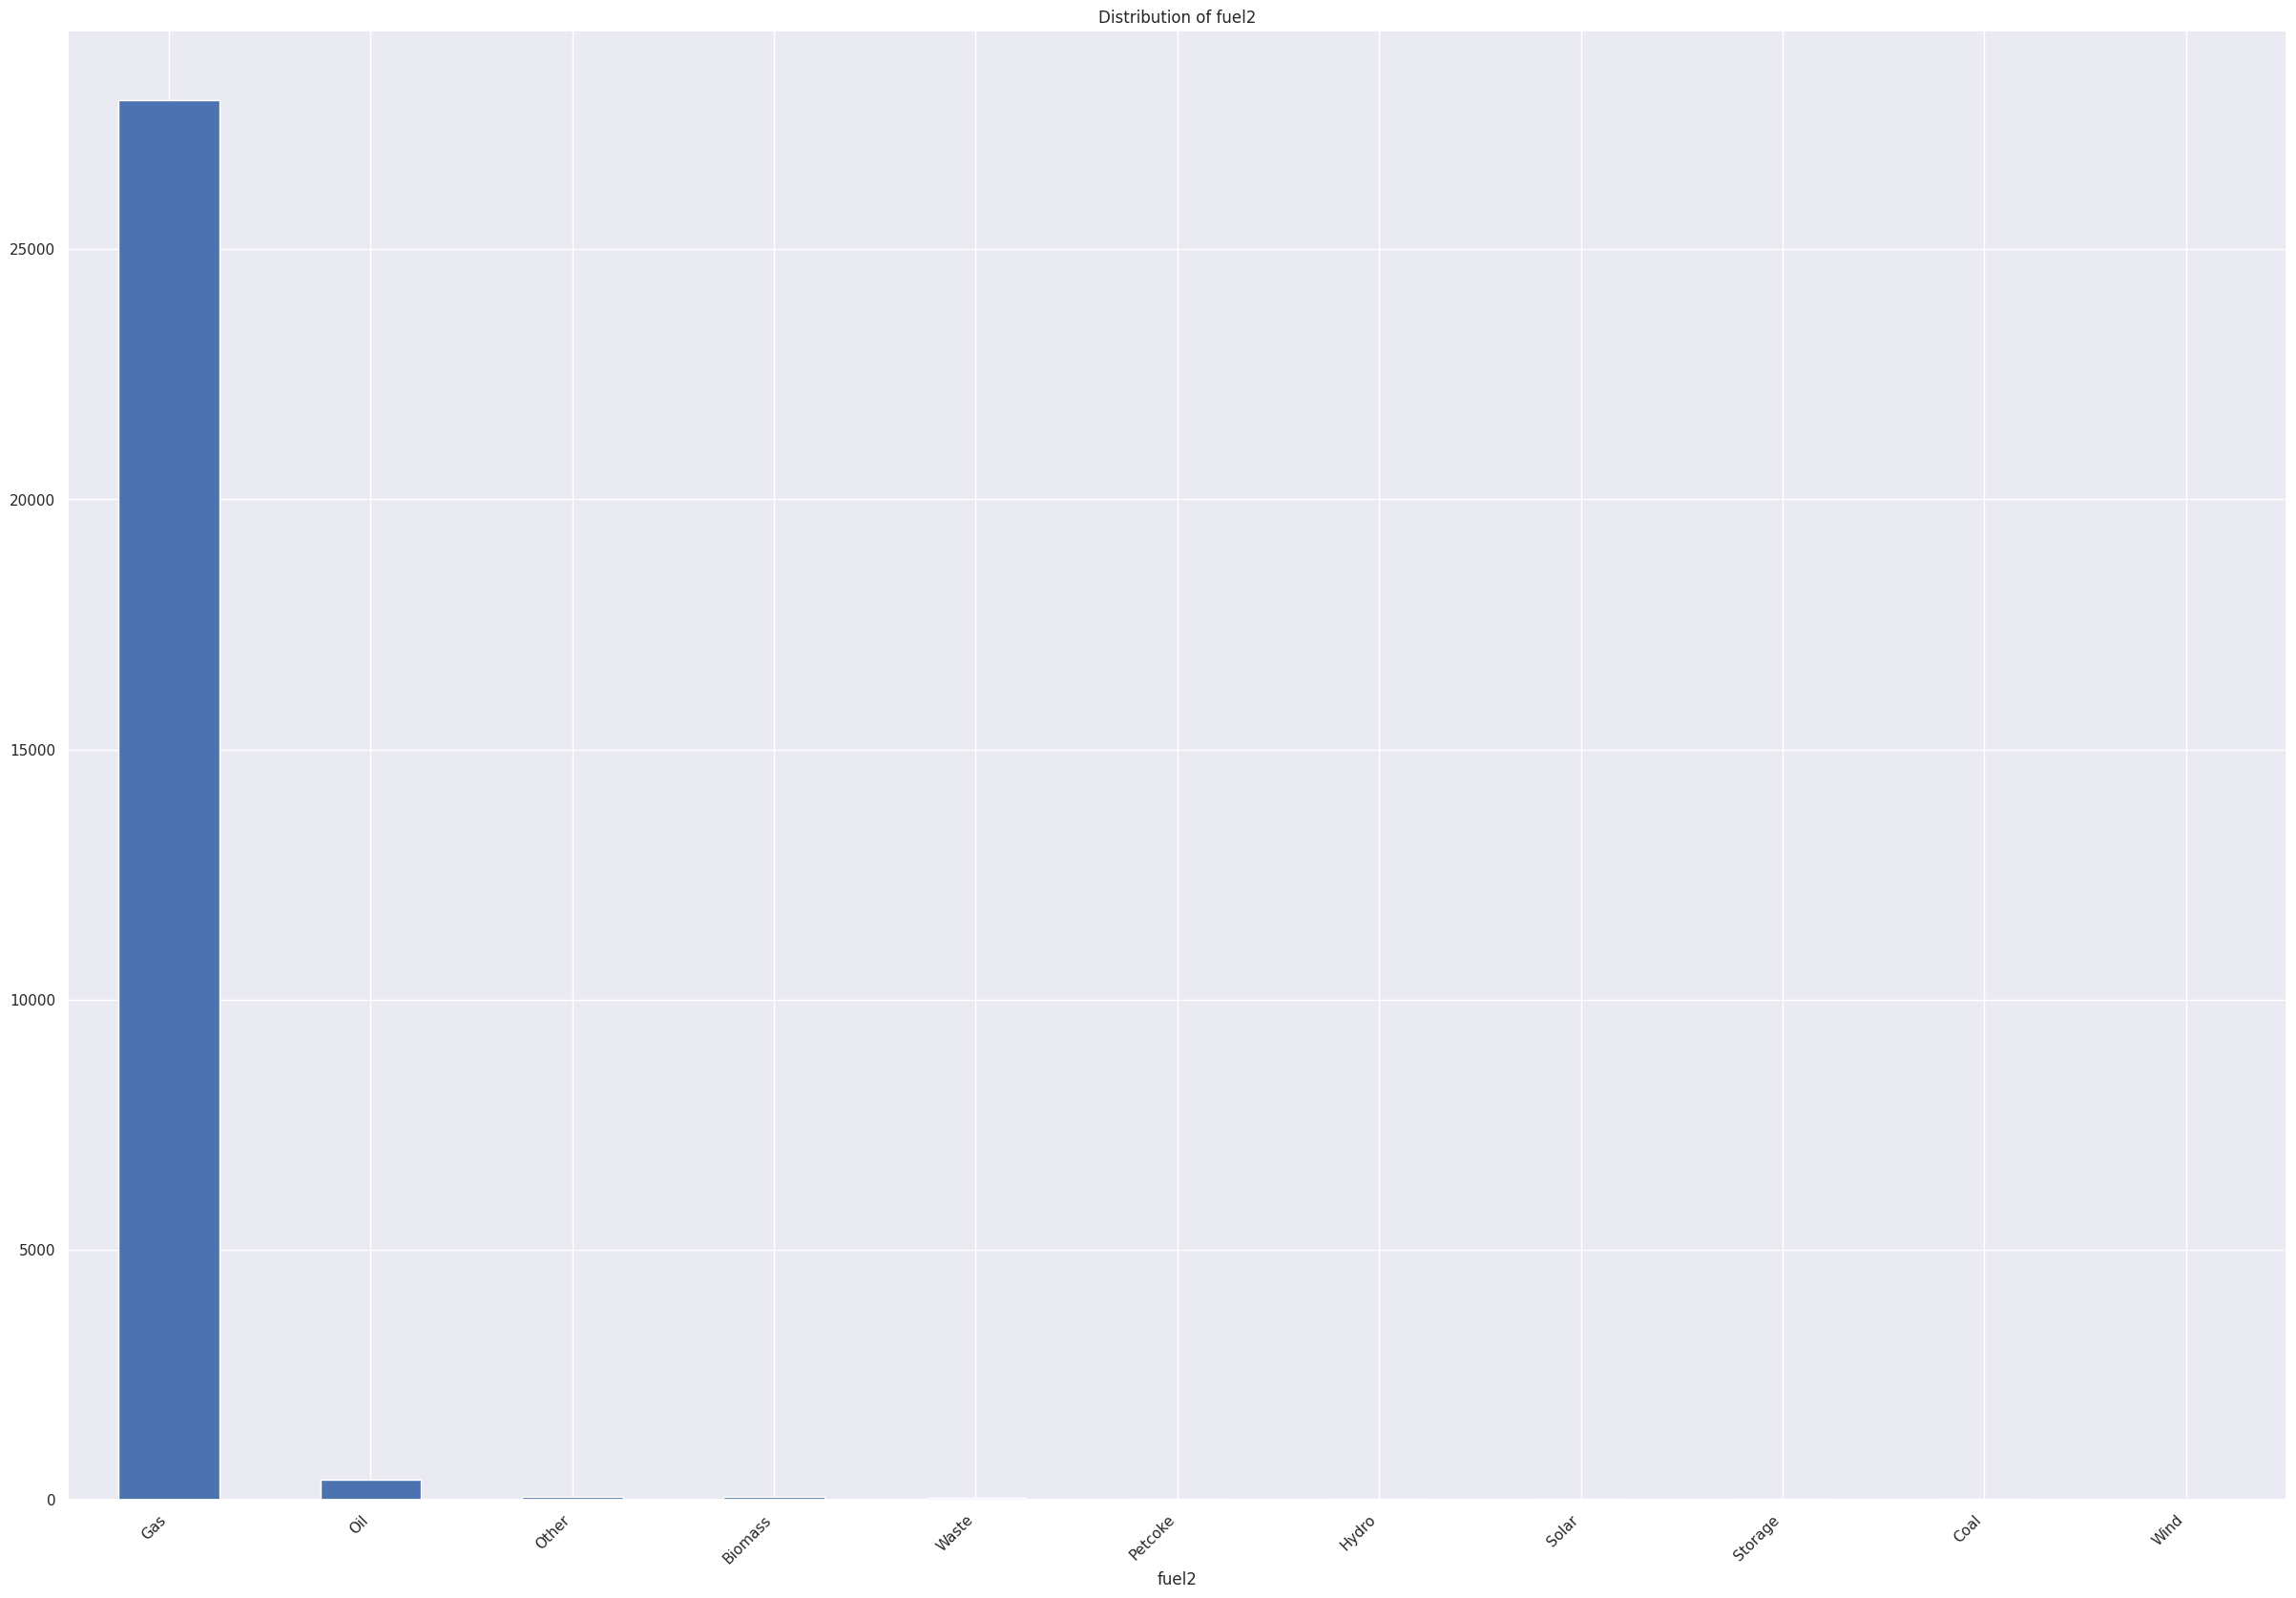


Value counts for fuel3:
fuel3
Gas        28506
Oil           54
Biomass       39
Other         33
Solar         12
Hydro          7
Waste          5
Storage        3
Wind           3
Coal           1
Petcoke        1
Name: count, dtype: int64


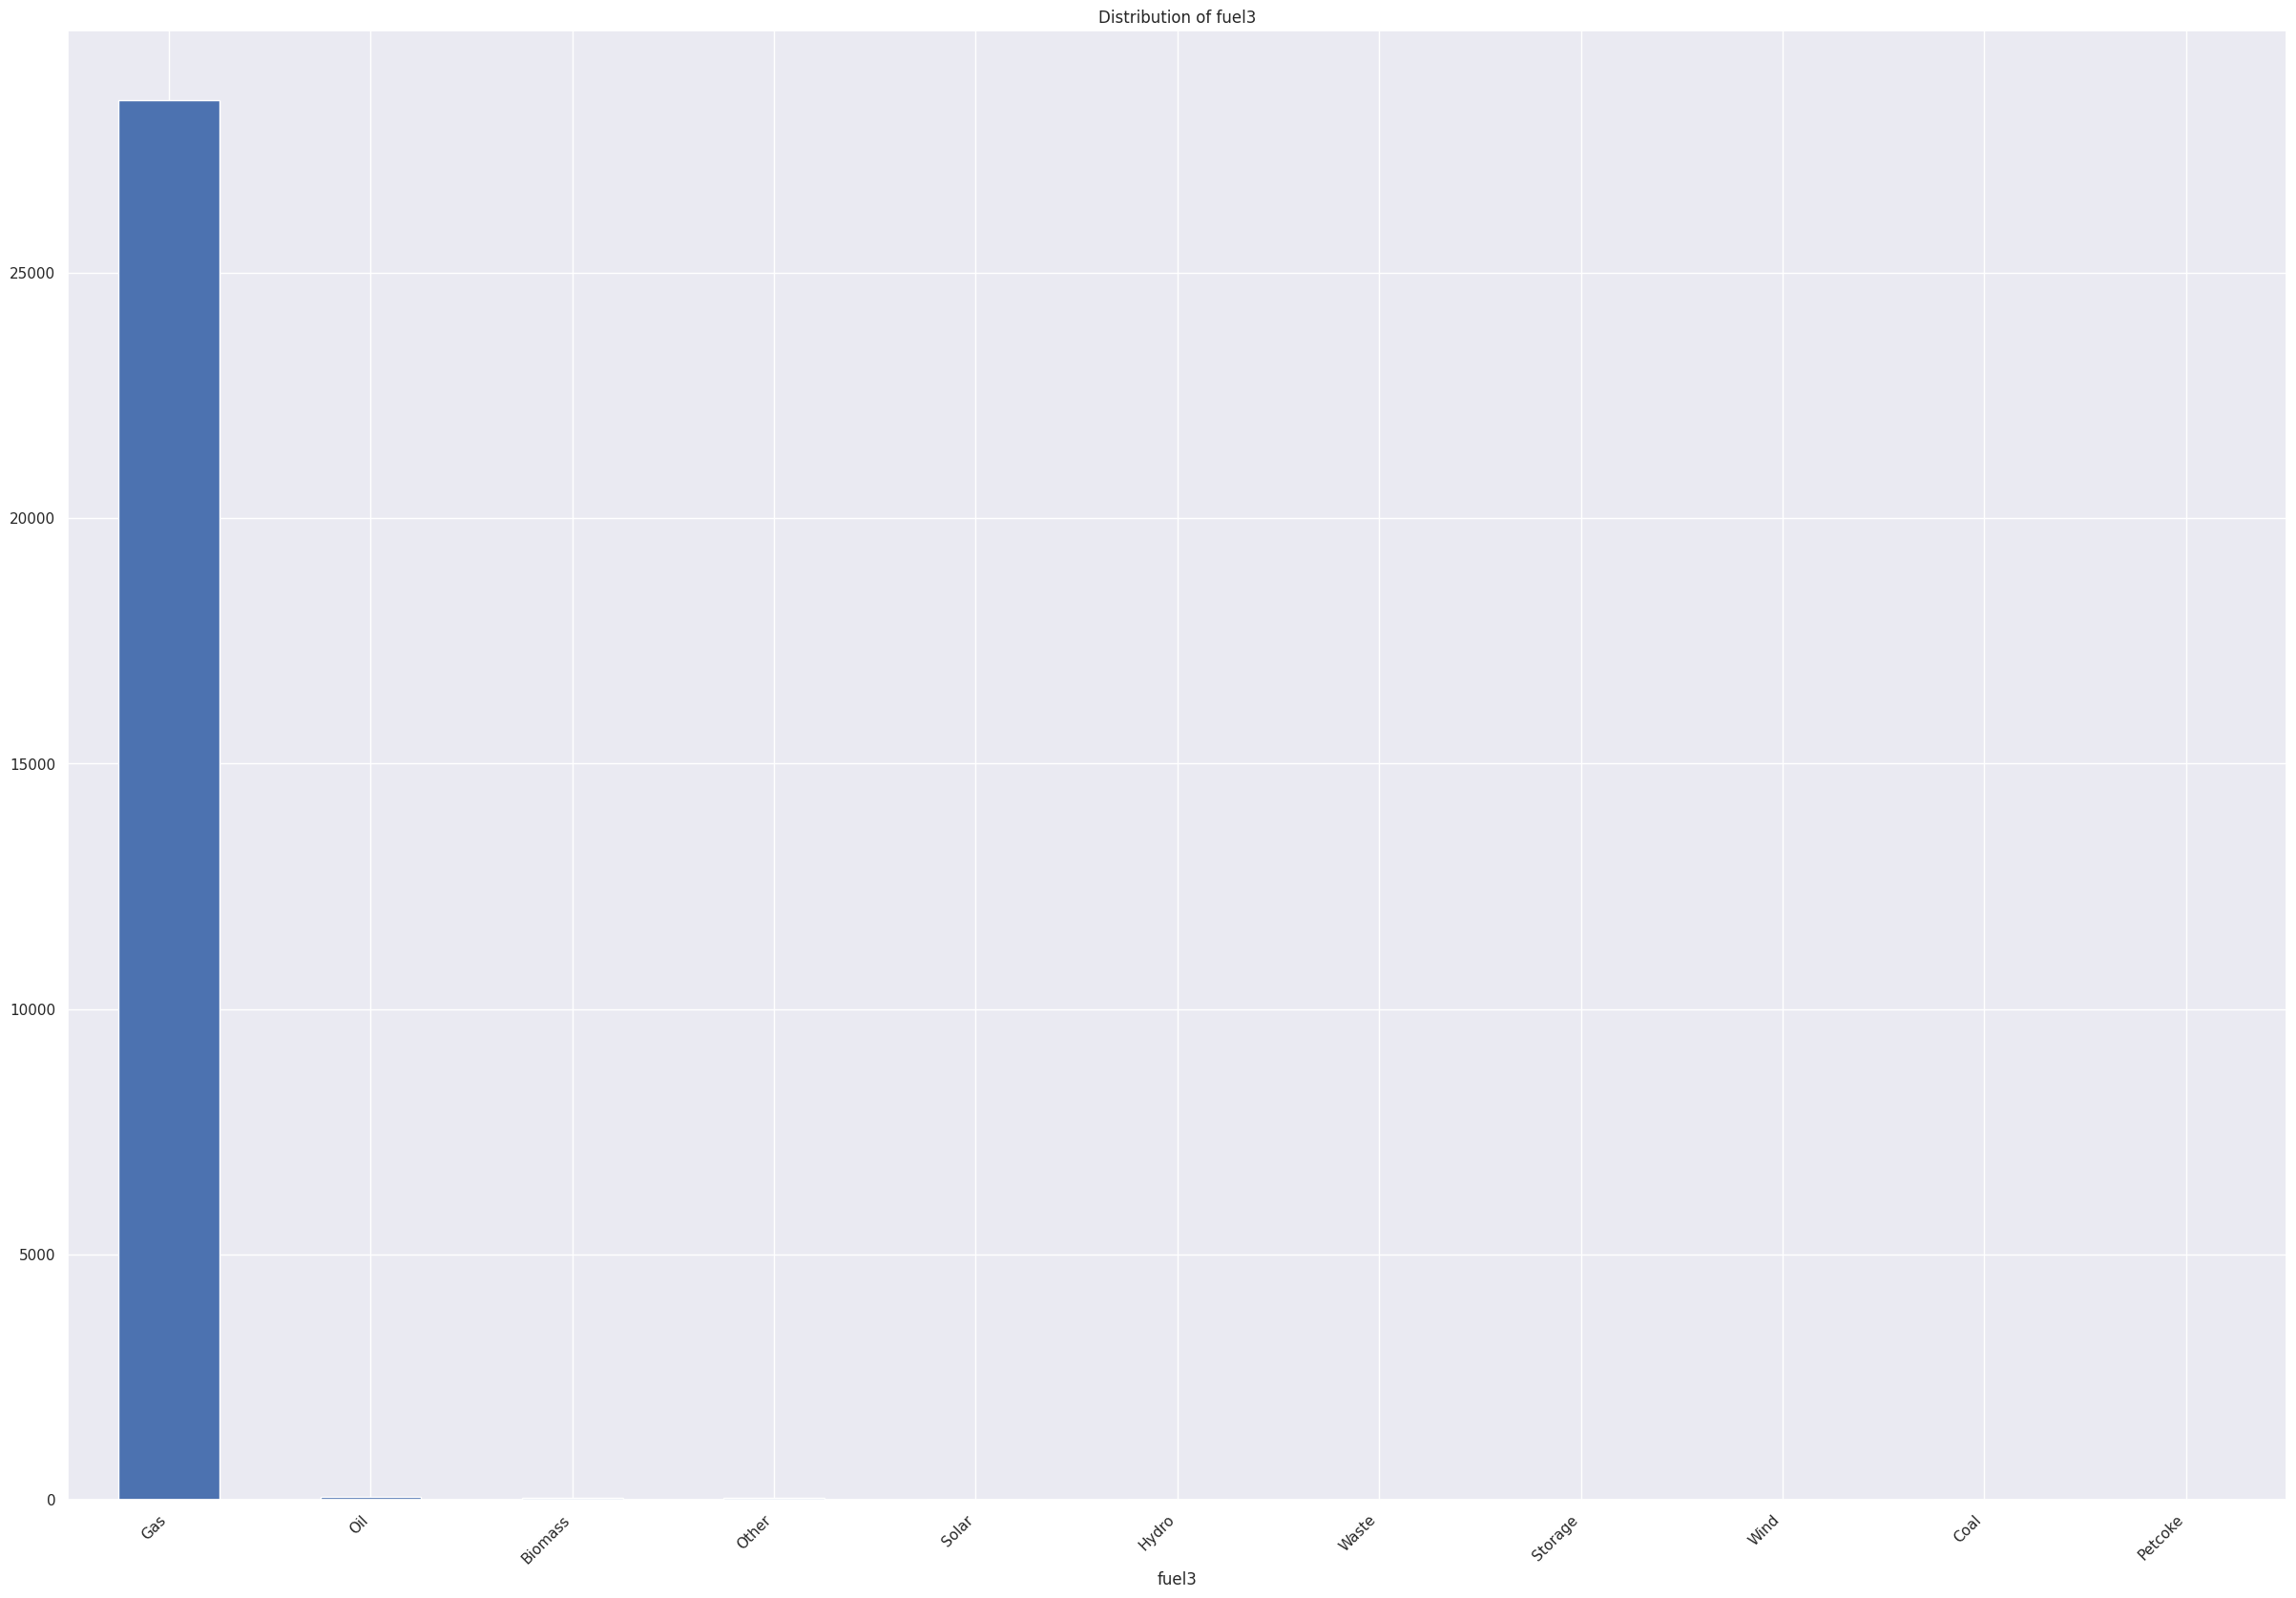


Value counts for owner:
owner
Lightsource Renewable Energy            10693
Verbund                                    83
Pacific Gas & Electric Co                  82
Sustainable Power Group  LLC               77
Cypress Creek Renewables                   73
                                        ...  
CORPORACION EOLICA DE ZAMORA  S.L.          1
GENERAL EOLICA ARAGONESA  S.A.              1
IBERDROLA RENOVABLES ANDALUCIA S.A.U        1
ALDESA EOLICO PALOMAREJO S.A.U              1
Zambia Sugar                                1
Name: count, Length: 8746, dtype: int64


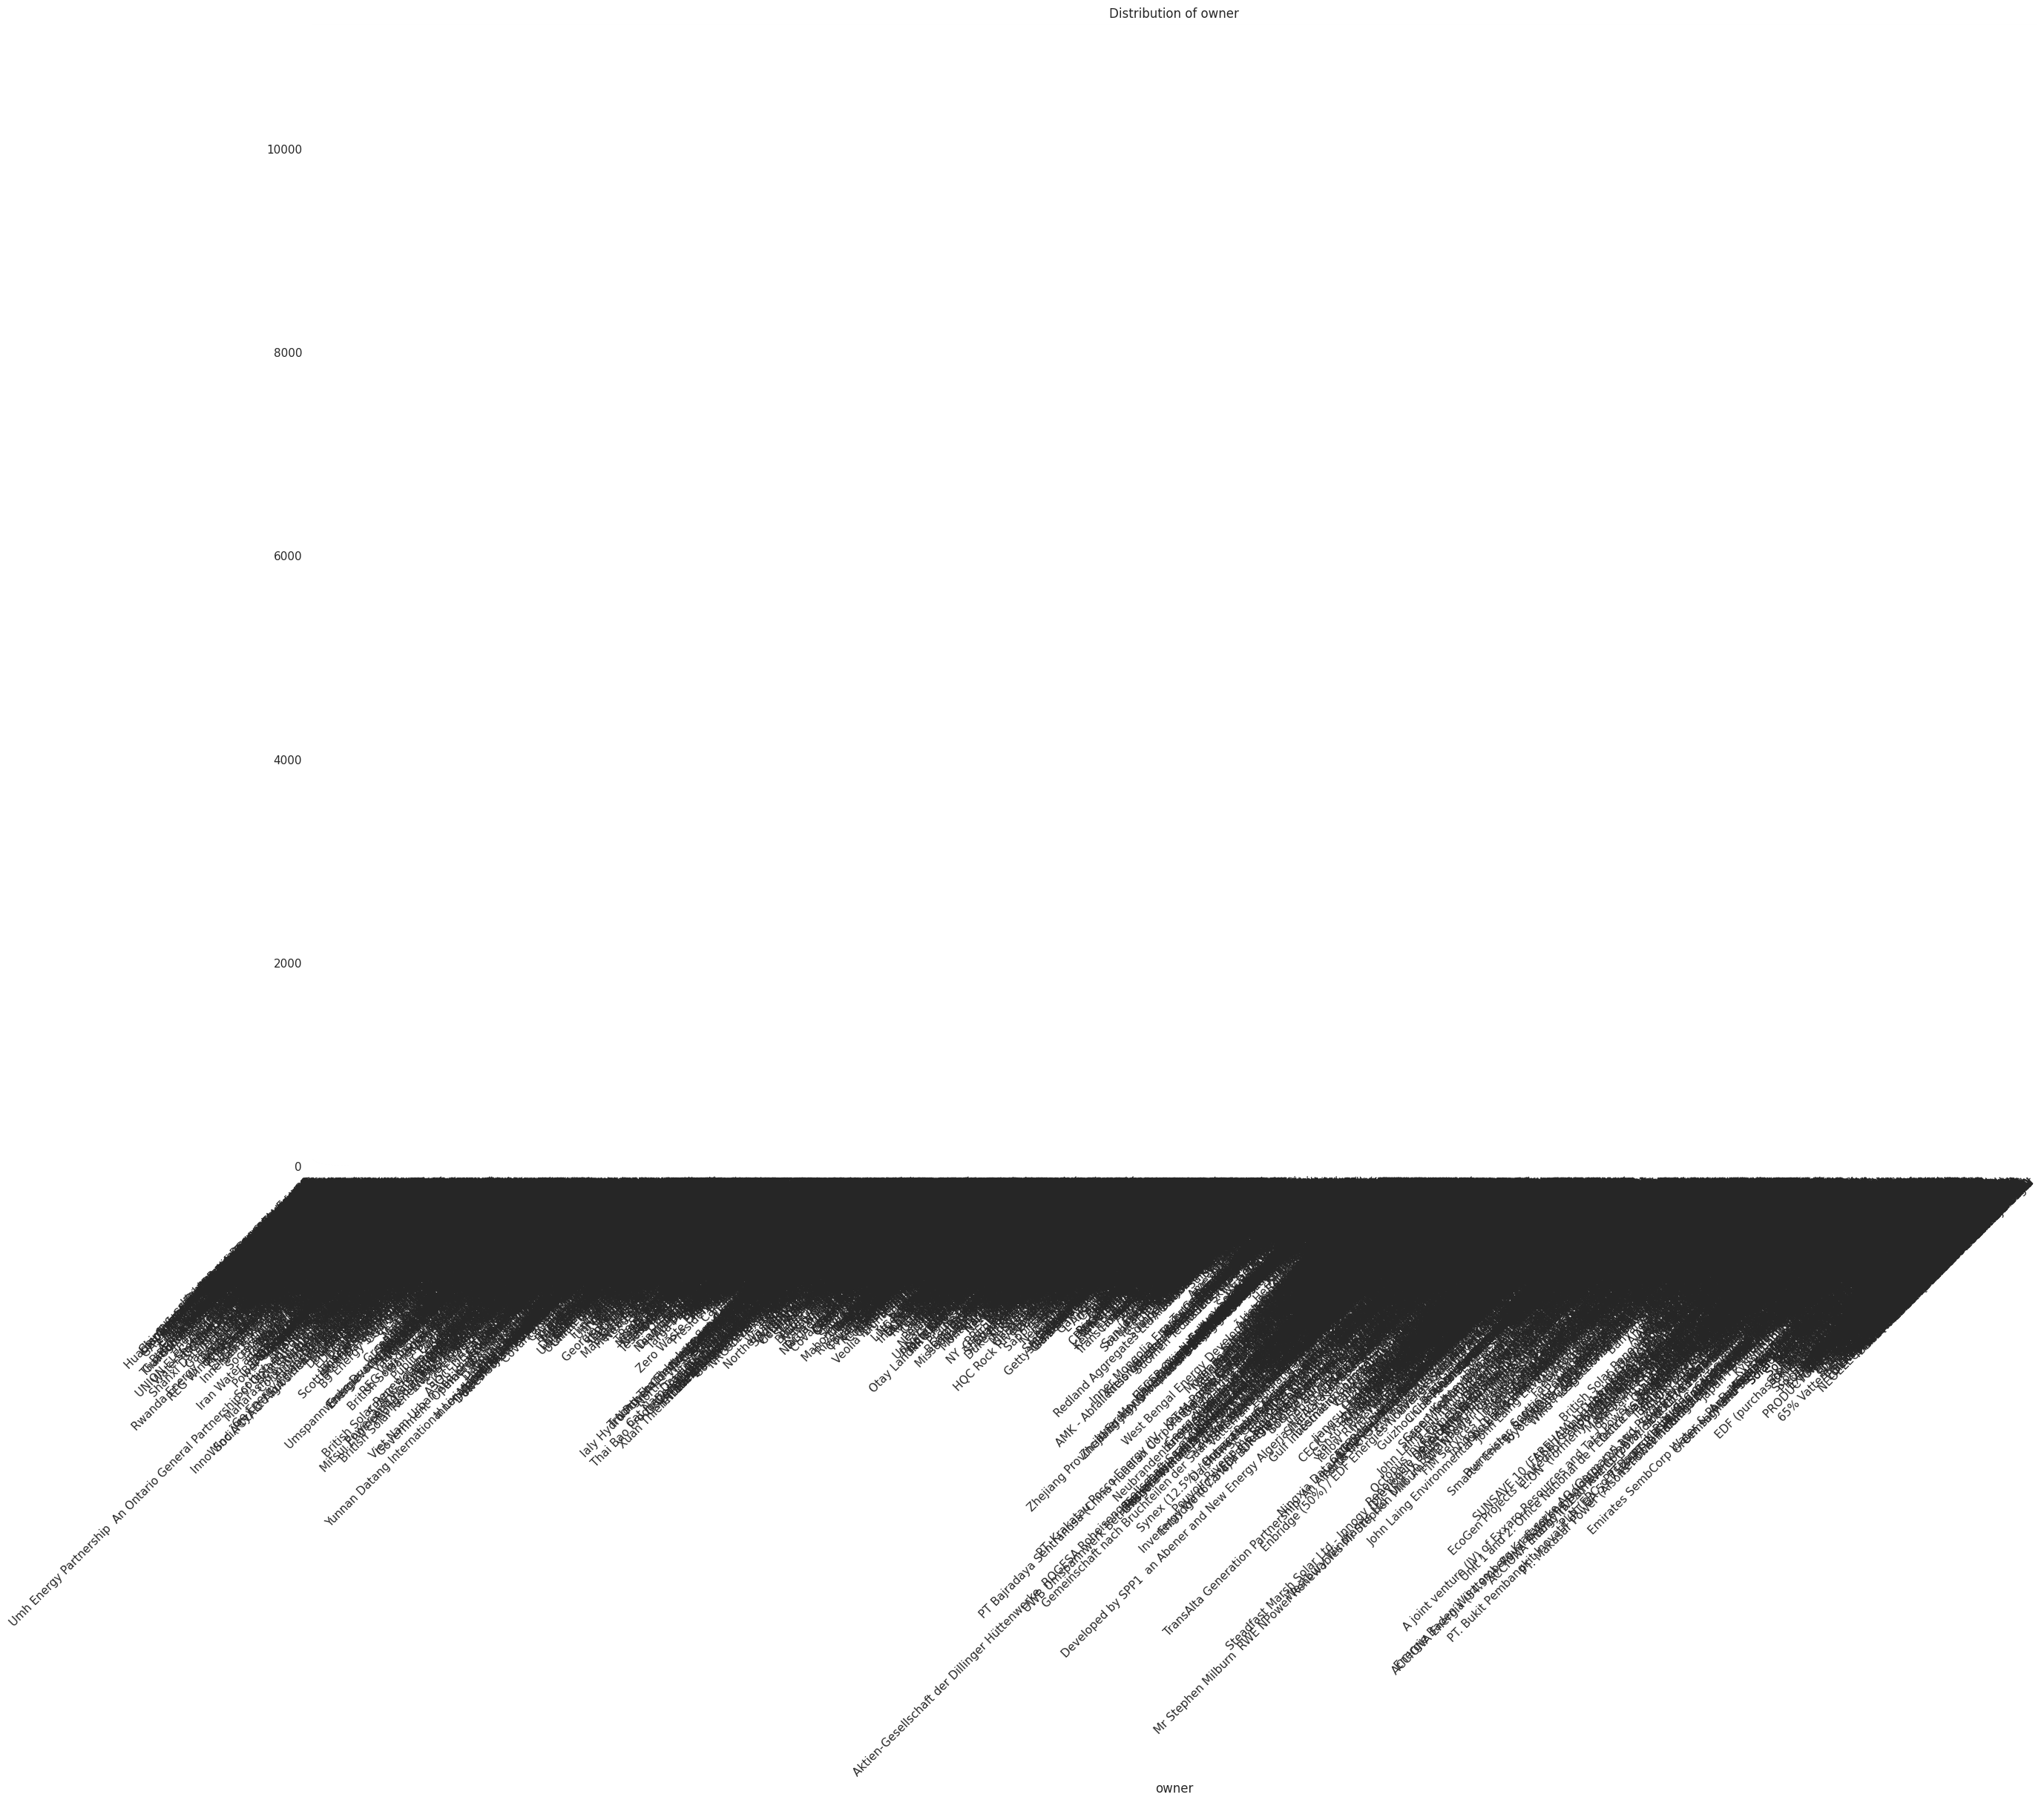


Value counts for source:
source
U.S. Energy Information Administration                  8077
Department for Business Energy & Industrial Strategy    2567
Open Power System Data                                  2404
Agência Nacional de Energia Elétrica (Brazil)           2340
UNFCCC CDM Registry                                     1619
                                                        ... 
Dcm & chem                                                 1
Gem Sugars ltd                                             1
Real Estate e                                              1
Sepset Constructio te                                      1
Nava Bharat                                                1
Name: count, Length: 823, dtype: int64


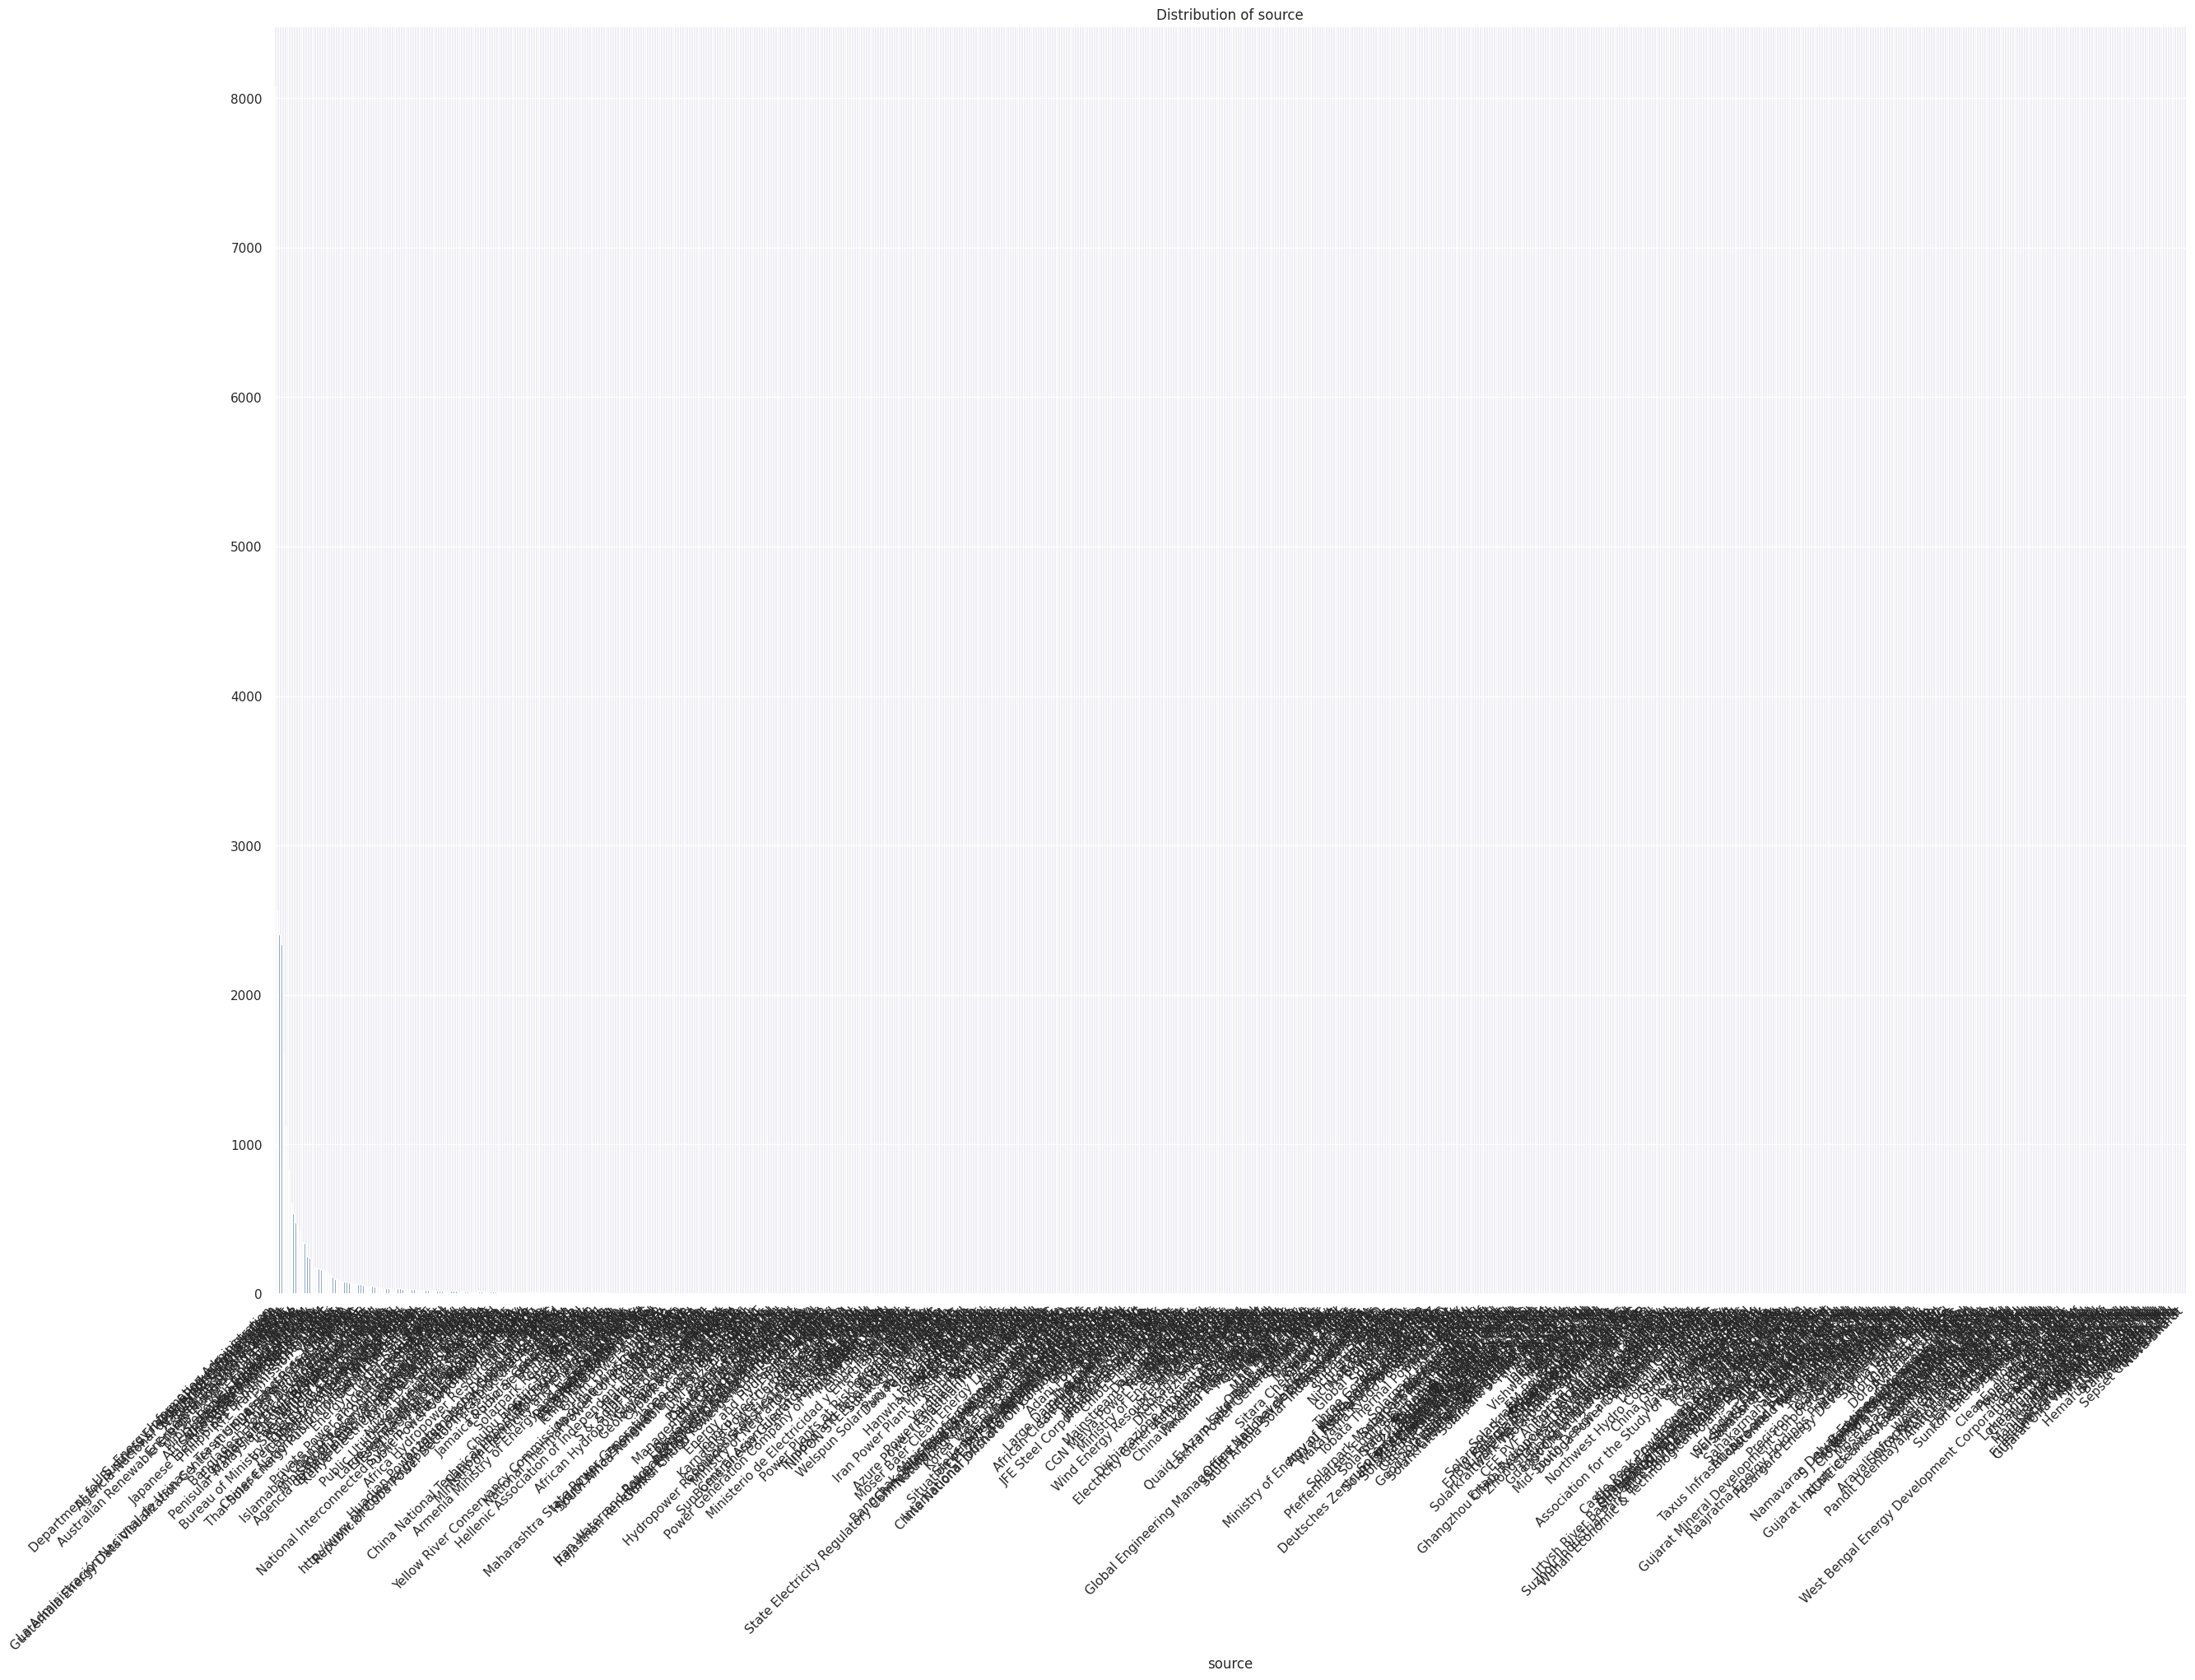


Value counts for geolocation_source:
geolocation_source
U.S. Energy Information Administration                                                 8498
WRI                                                                                    2912
UK Renewable Energy Planning Database                                                  2442
Open Power System Data                                                                 2392
Agência Nacional de Energia Elétrica (Brazil)                                          2338
Industry About                                                                         2052
GEODB                                                                                  1811
UNFCCC CDM Registry                                                                    1598
CARMA                                                                                  1319
Natural Resources Canada                                                               1125
Energias Endogenas de P

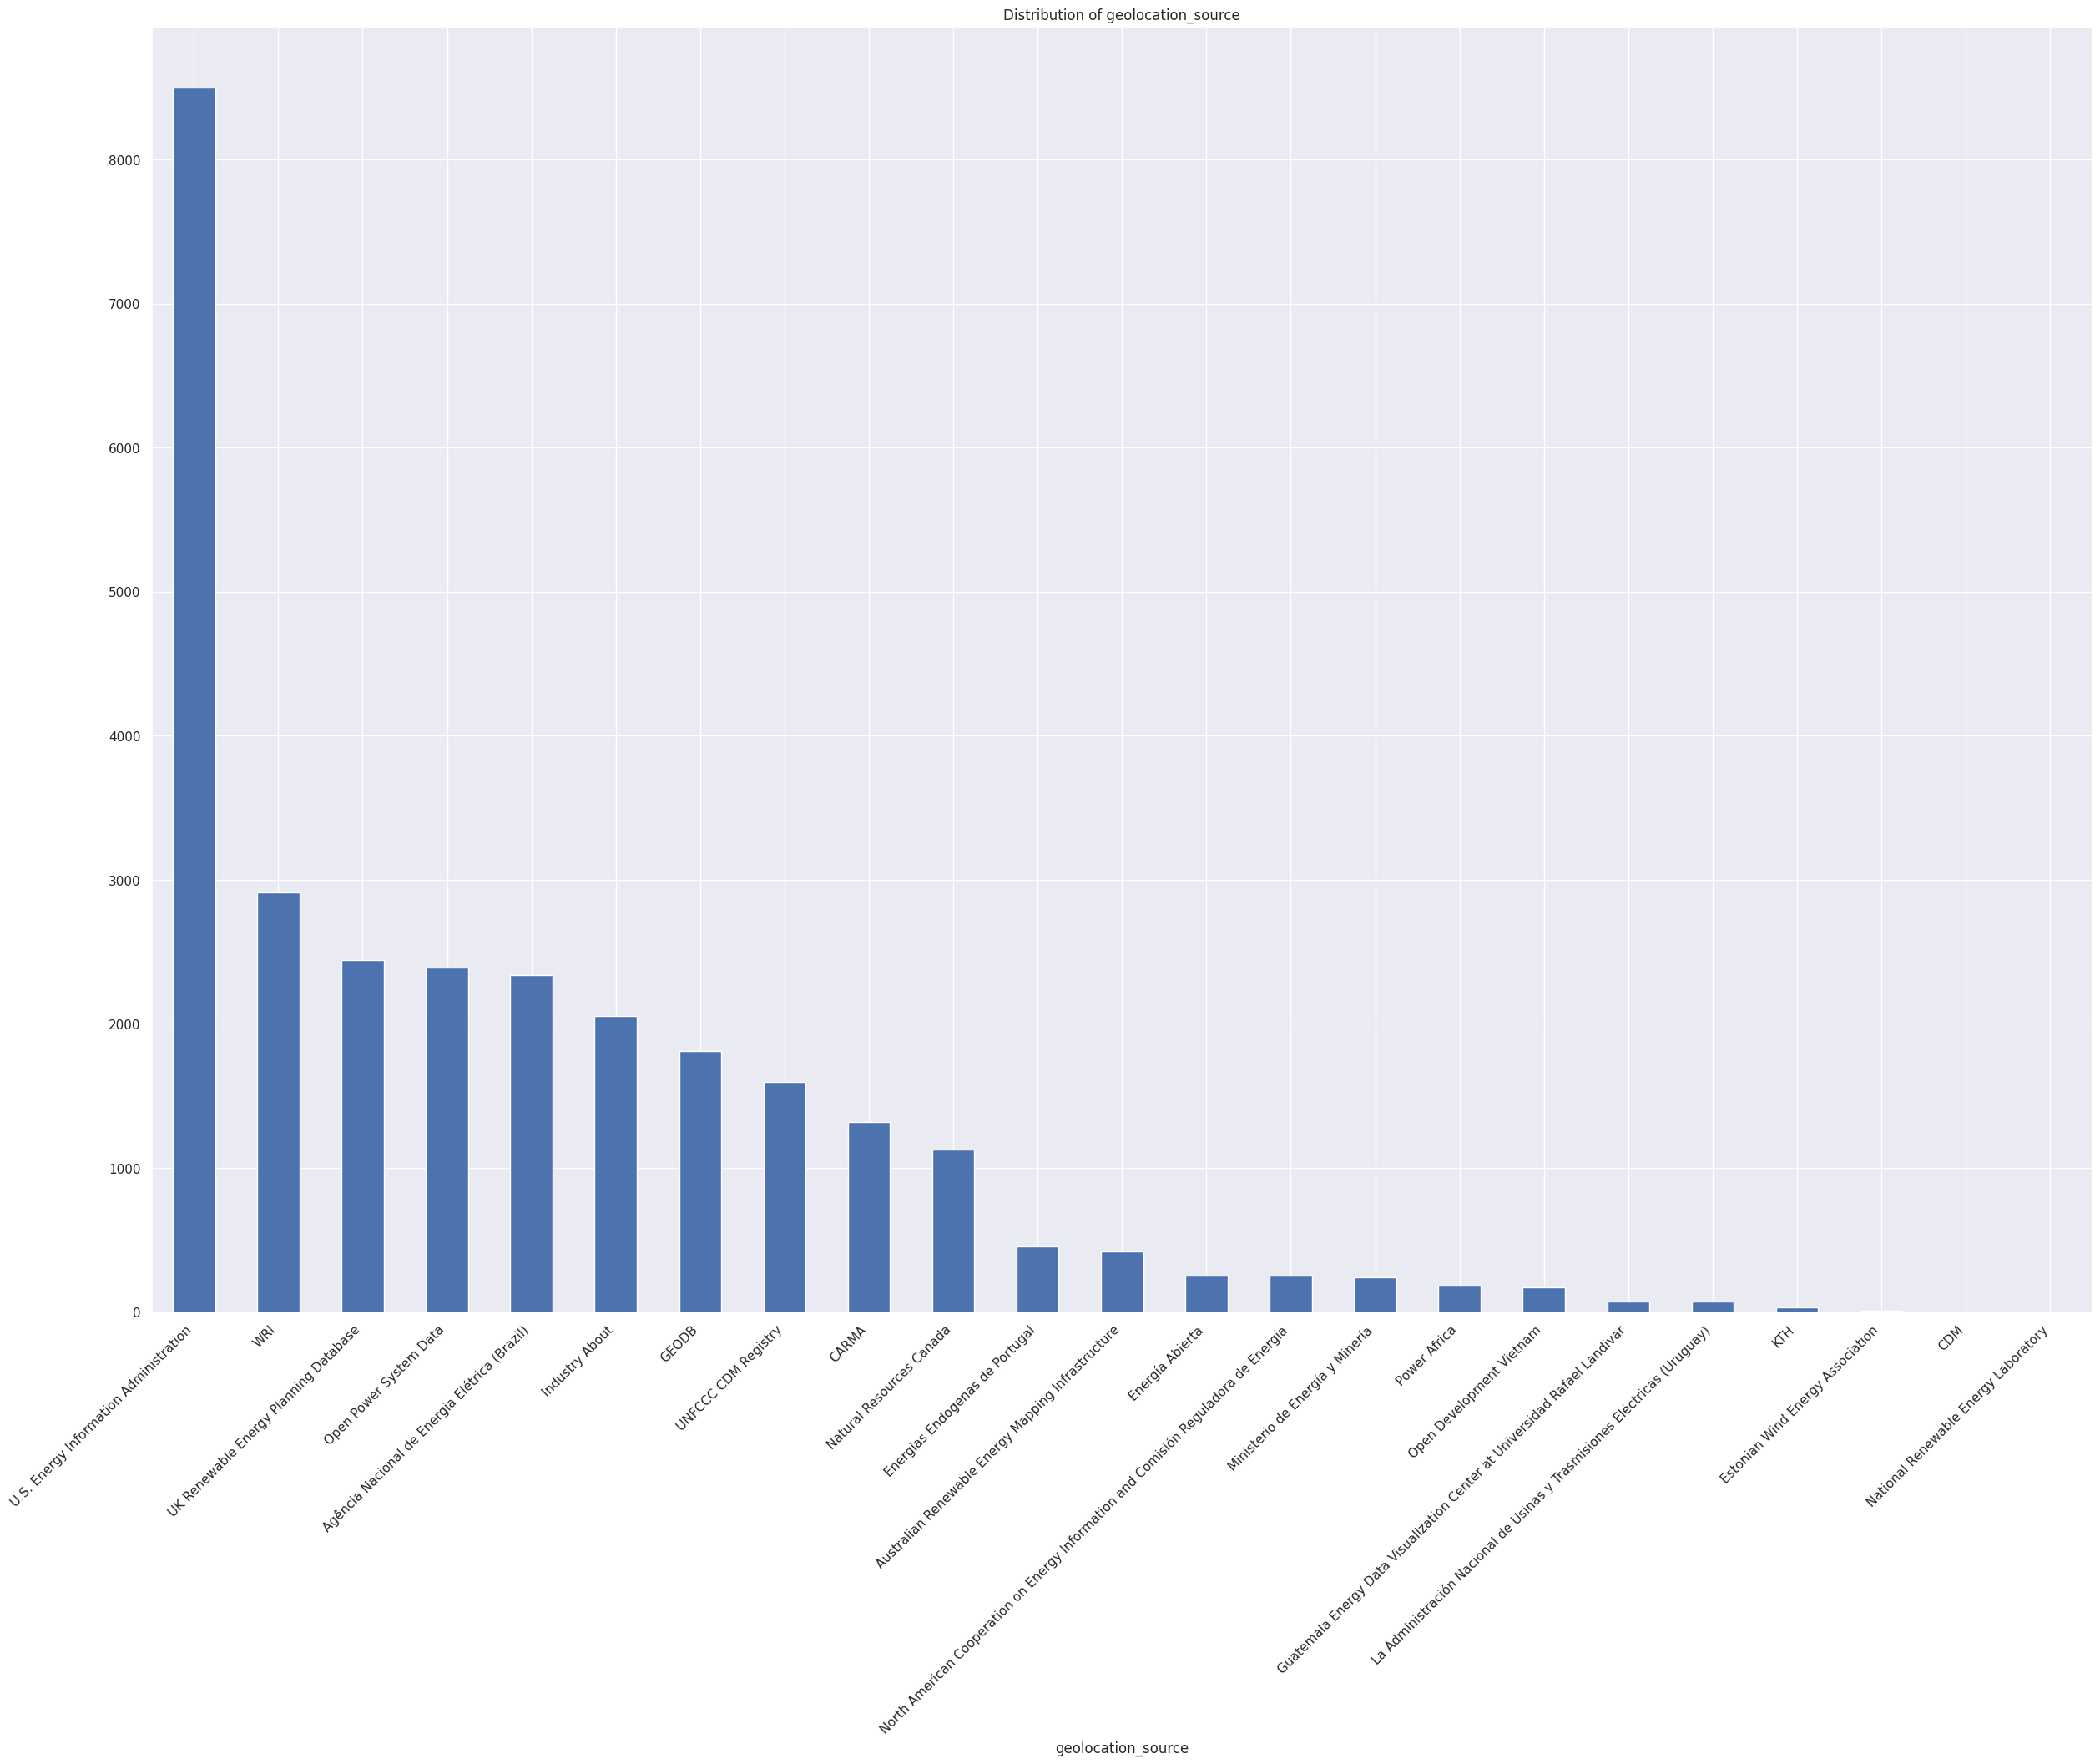

In [30]:
# Categorical Feature Analysis
categorical_cols = ['country', 'fuel1', 'fuel2', 'fuel3', 'owner', 'source', 'geolocation_source']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")
    plt.figure(figsize=(30, 20))  # Adjust figure size for better readability
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

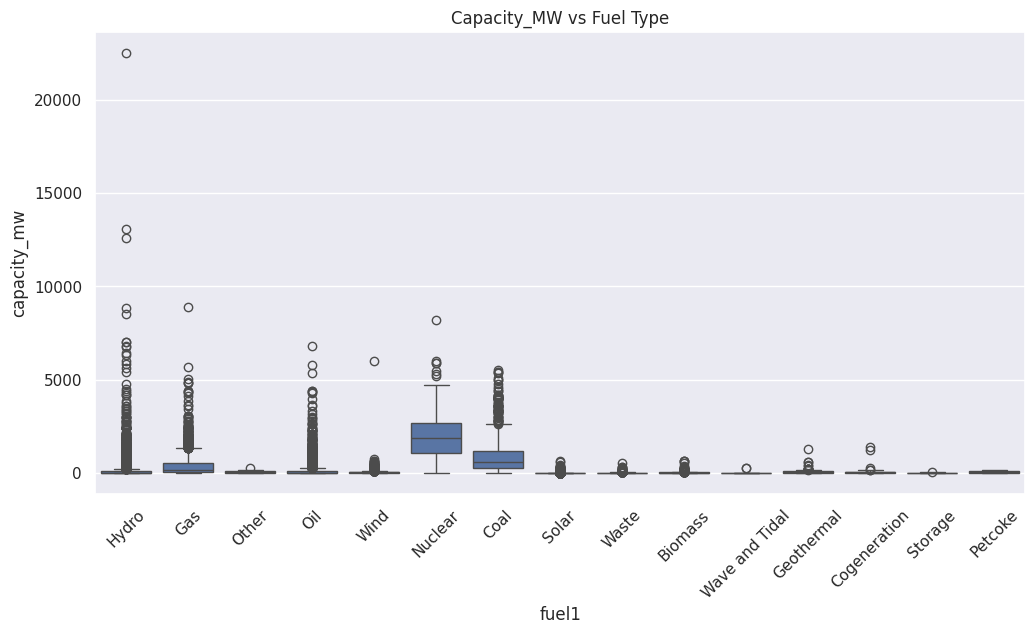

In [31]:
# Relationships between Numerical and Categorical features
# Example: Capacity vs Fuel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='fuel1', y='capacity_mw', data=df)
plt.title('Capacity_MW vs Fuel Type')
plt.xticks(rotation=45)
plt.show()



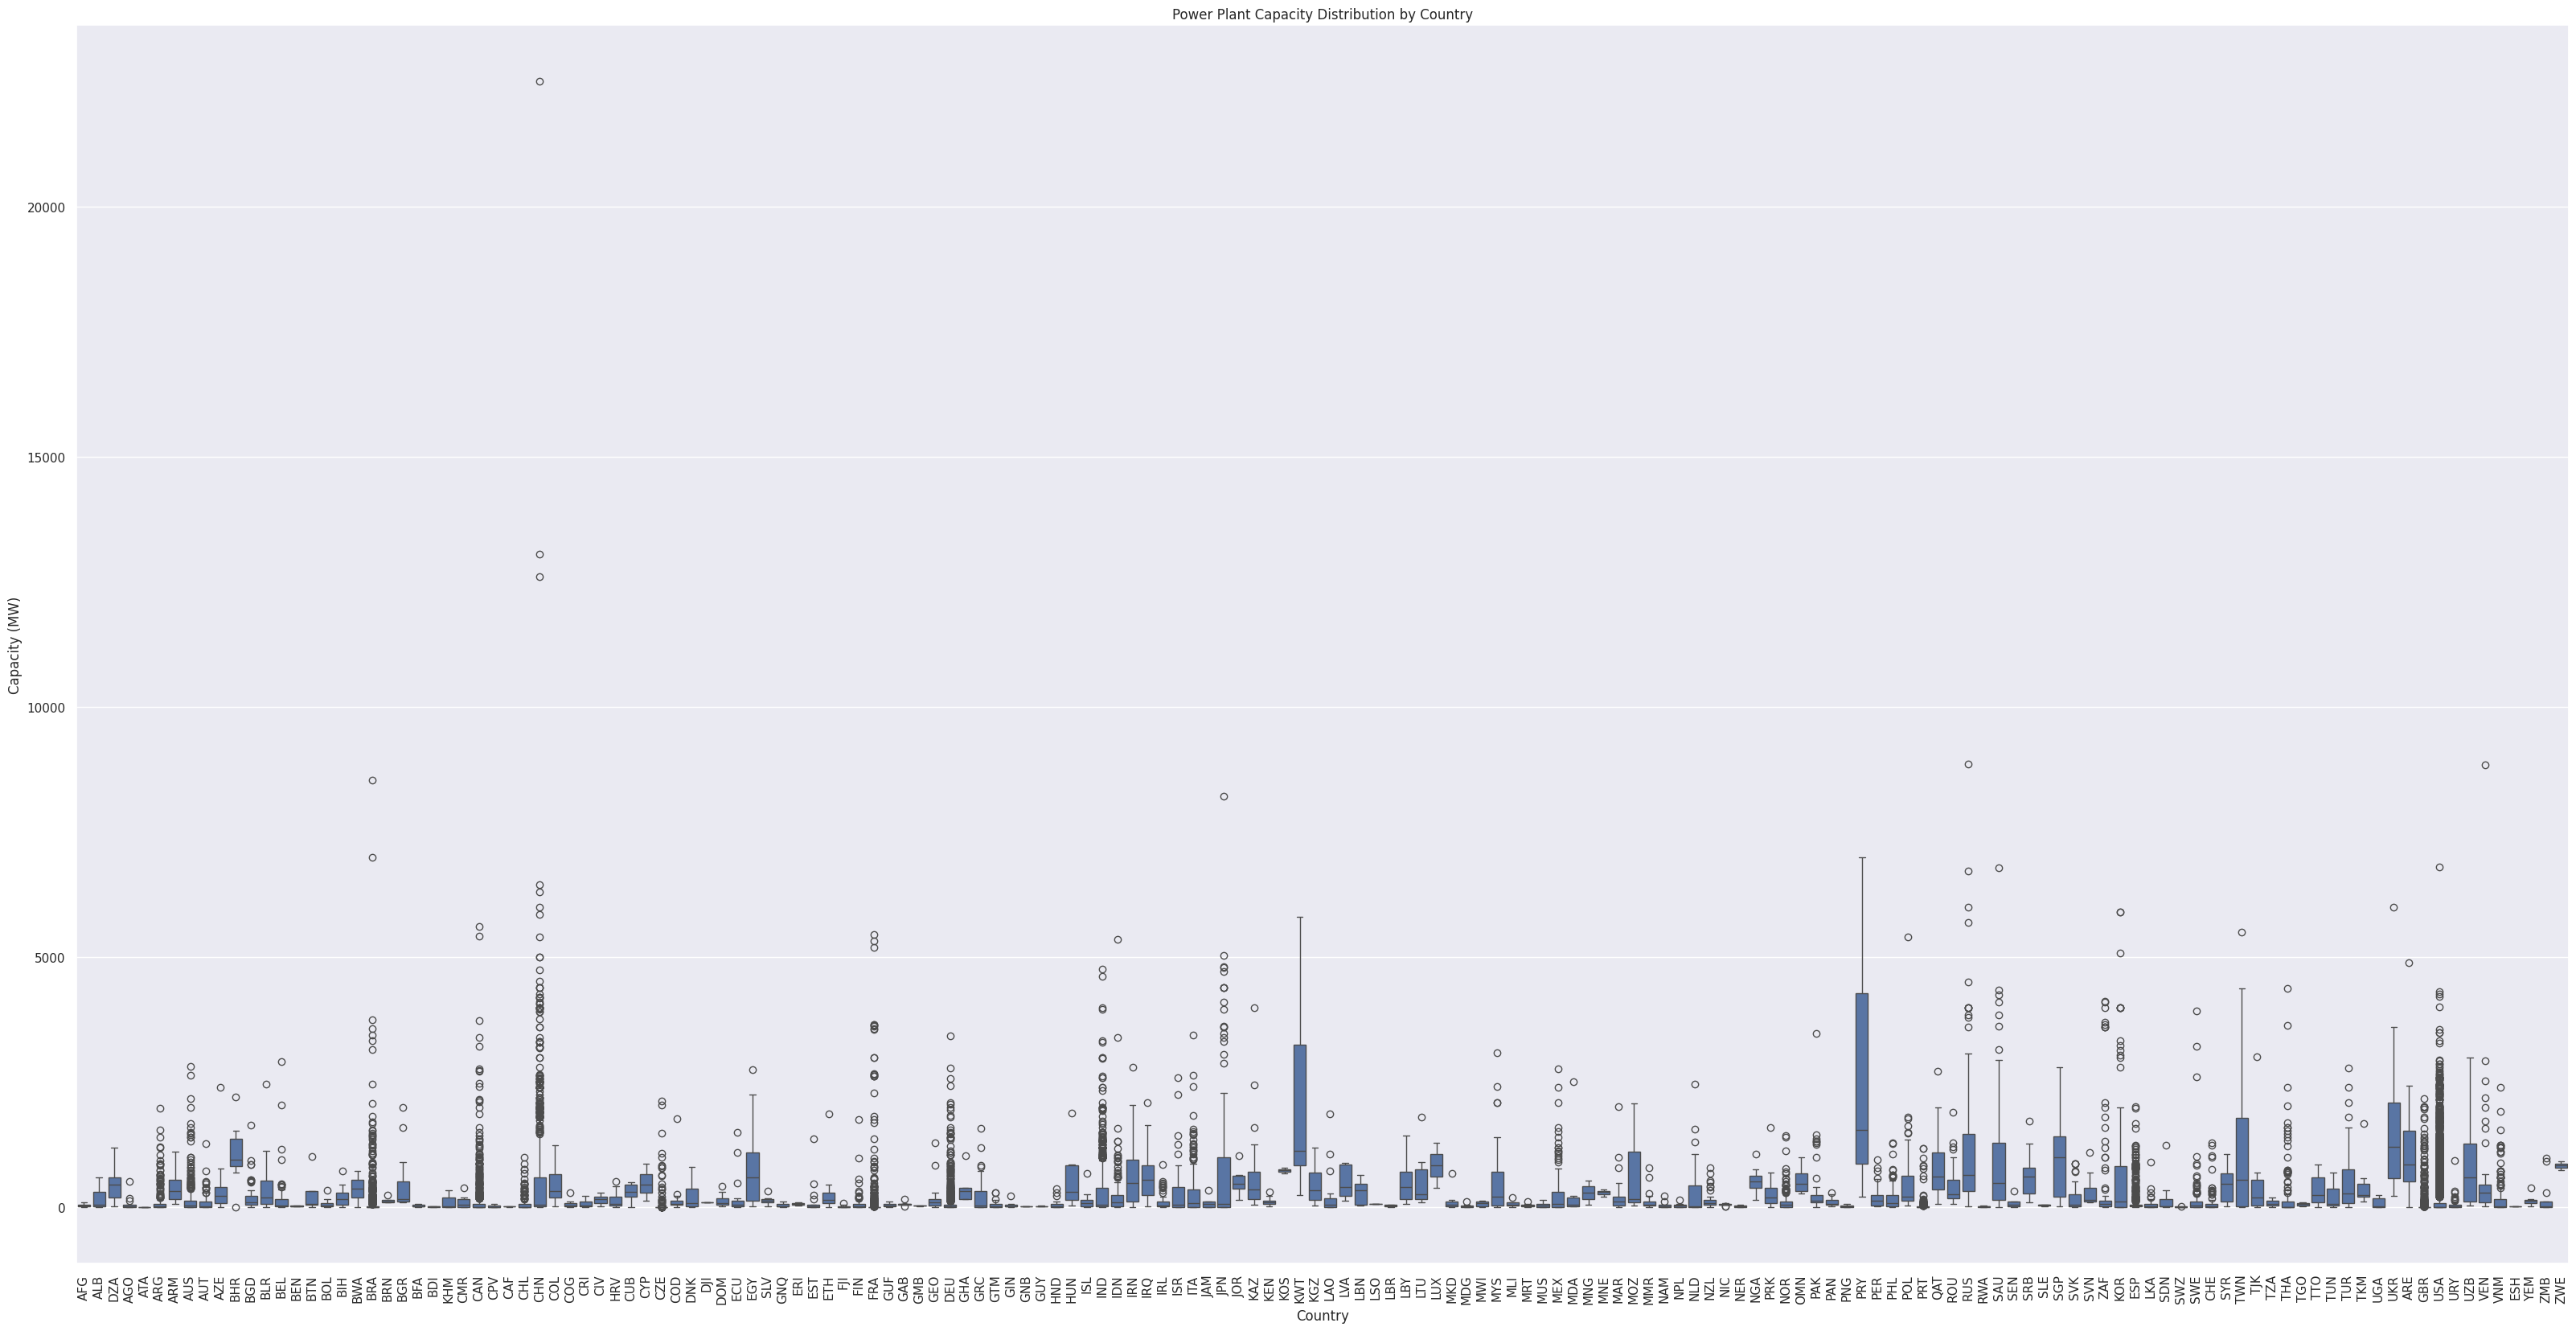

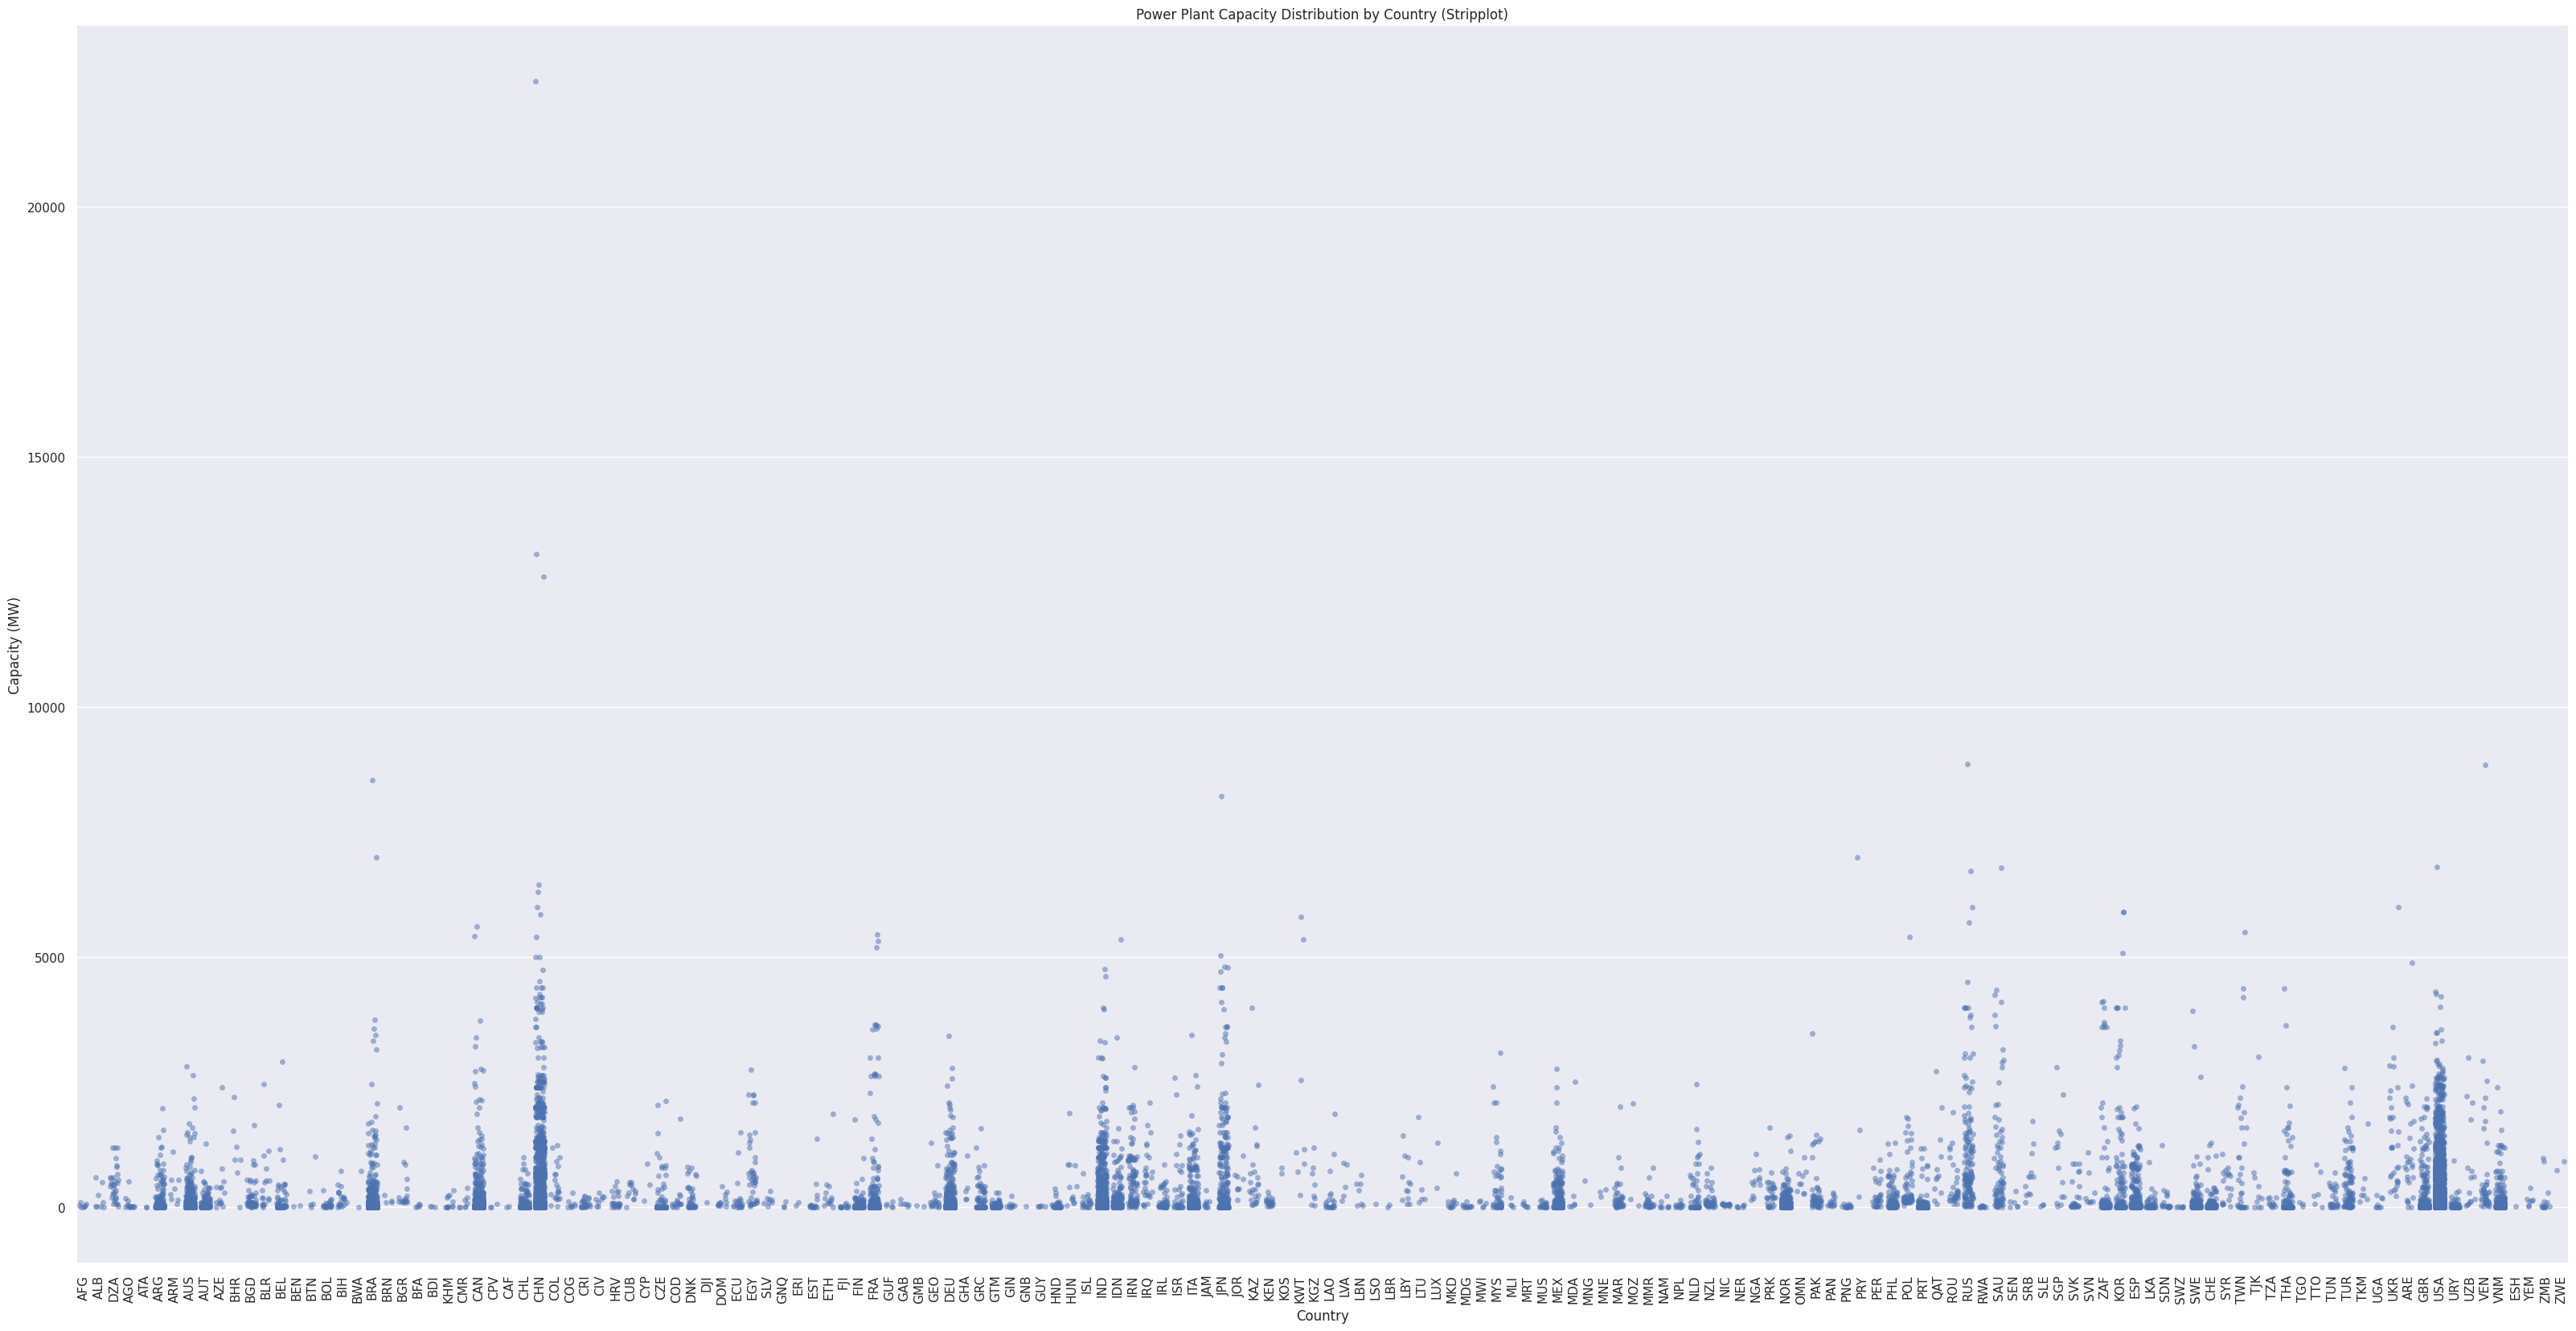

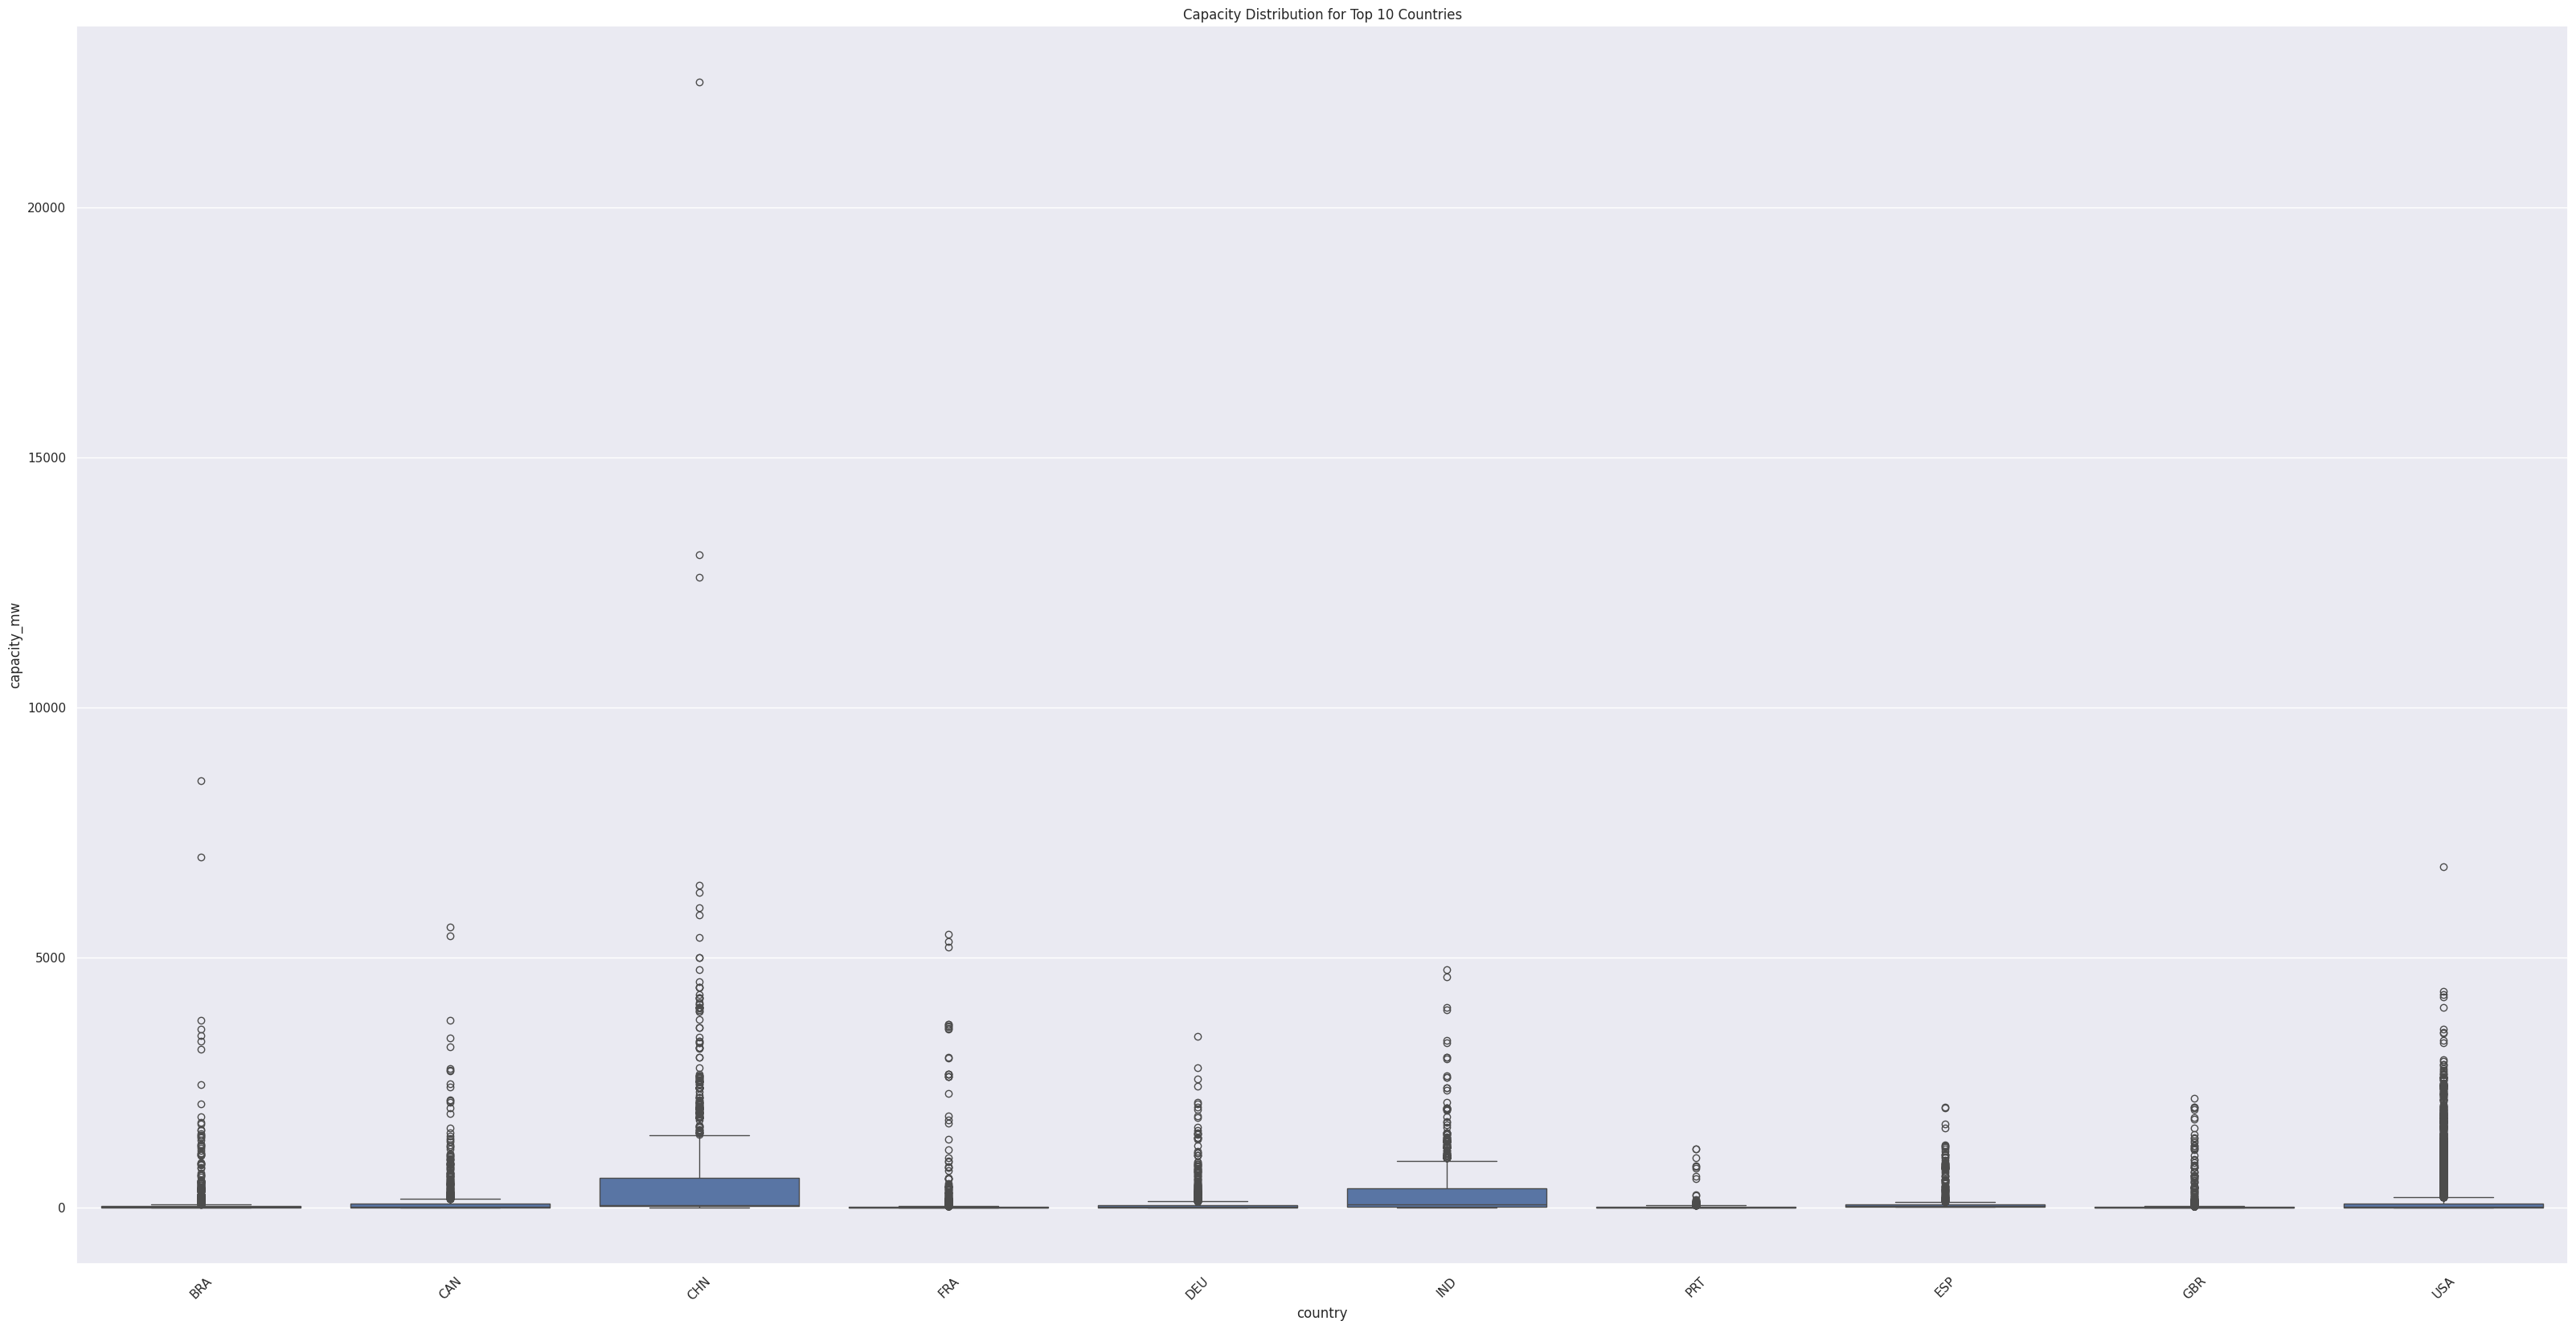

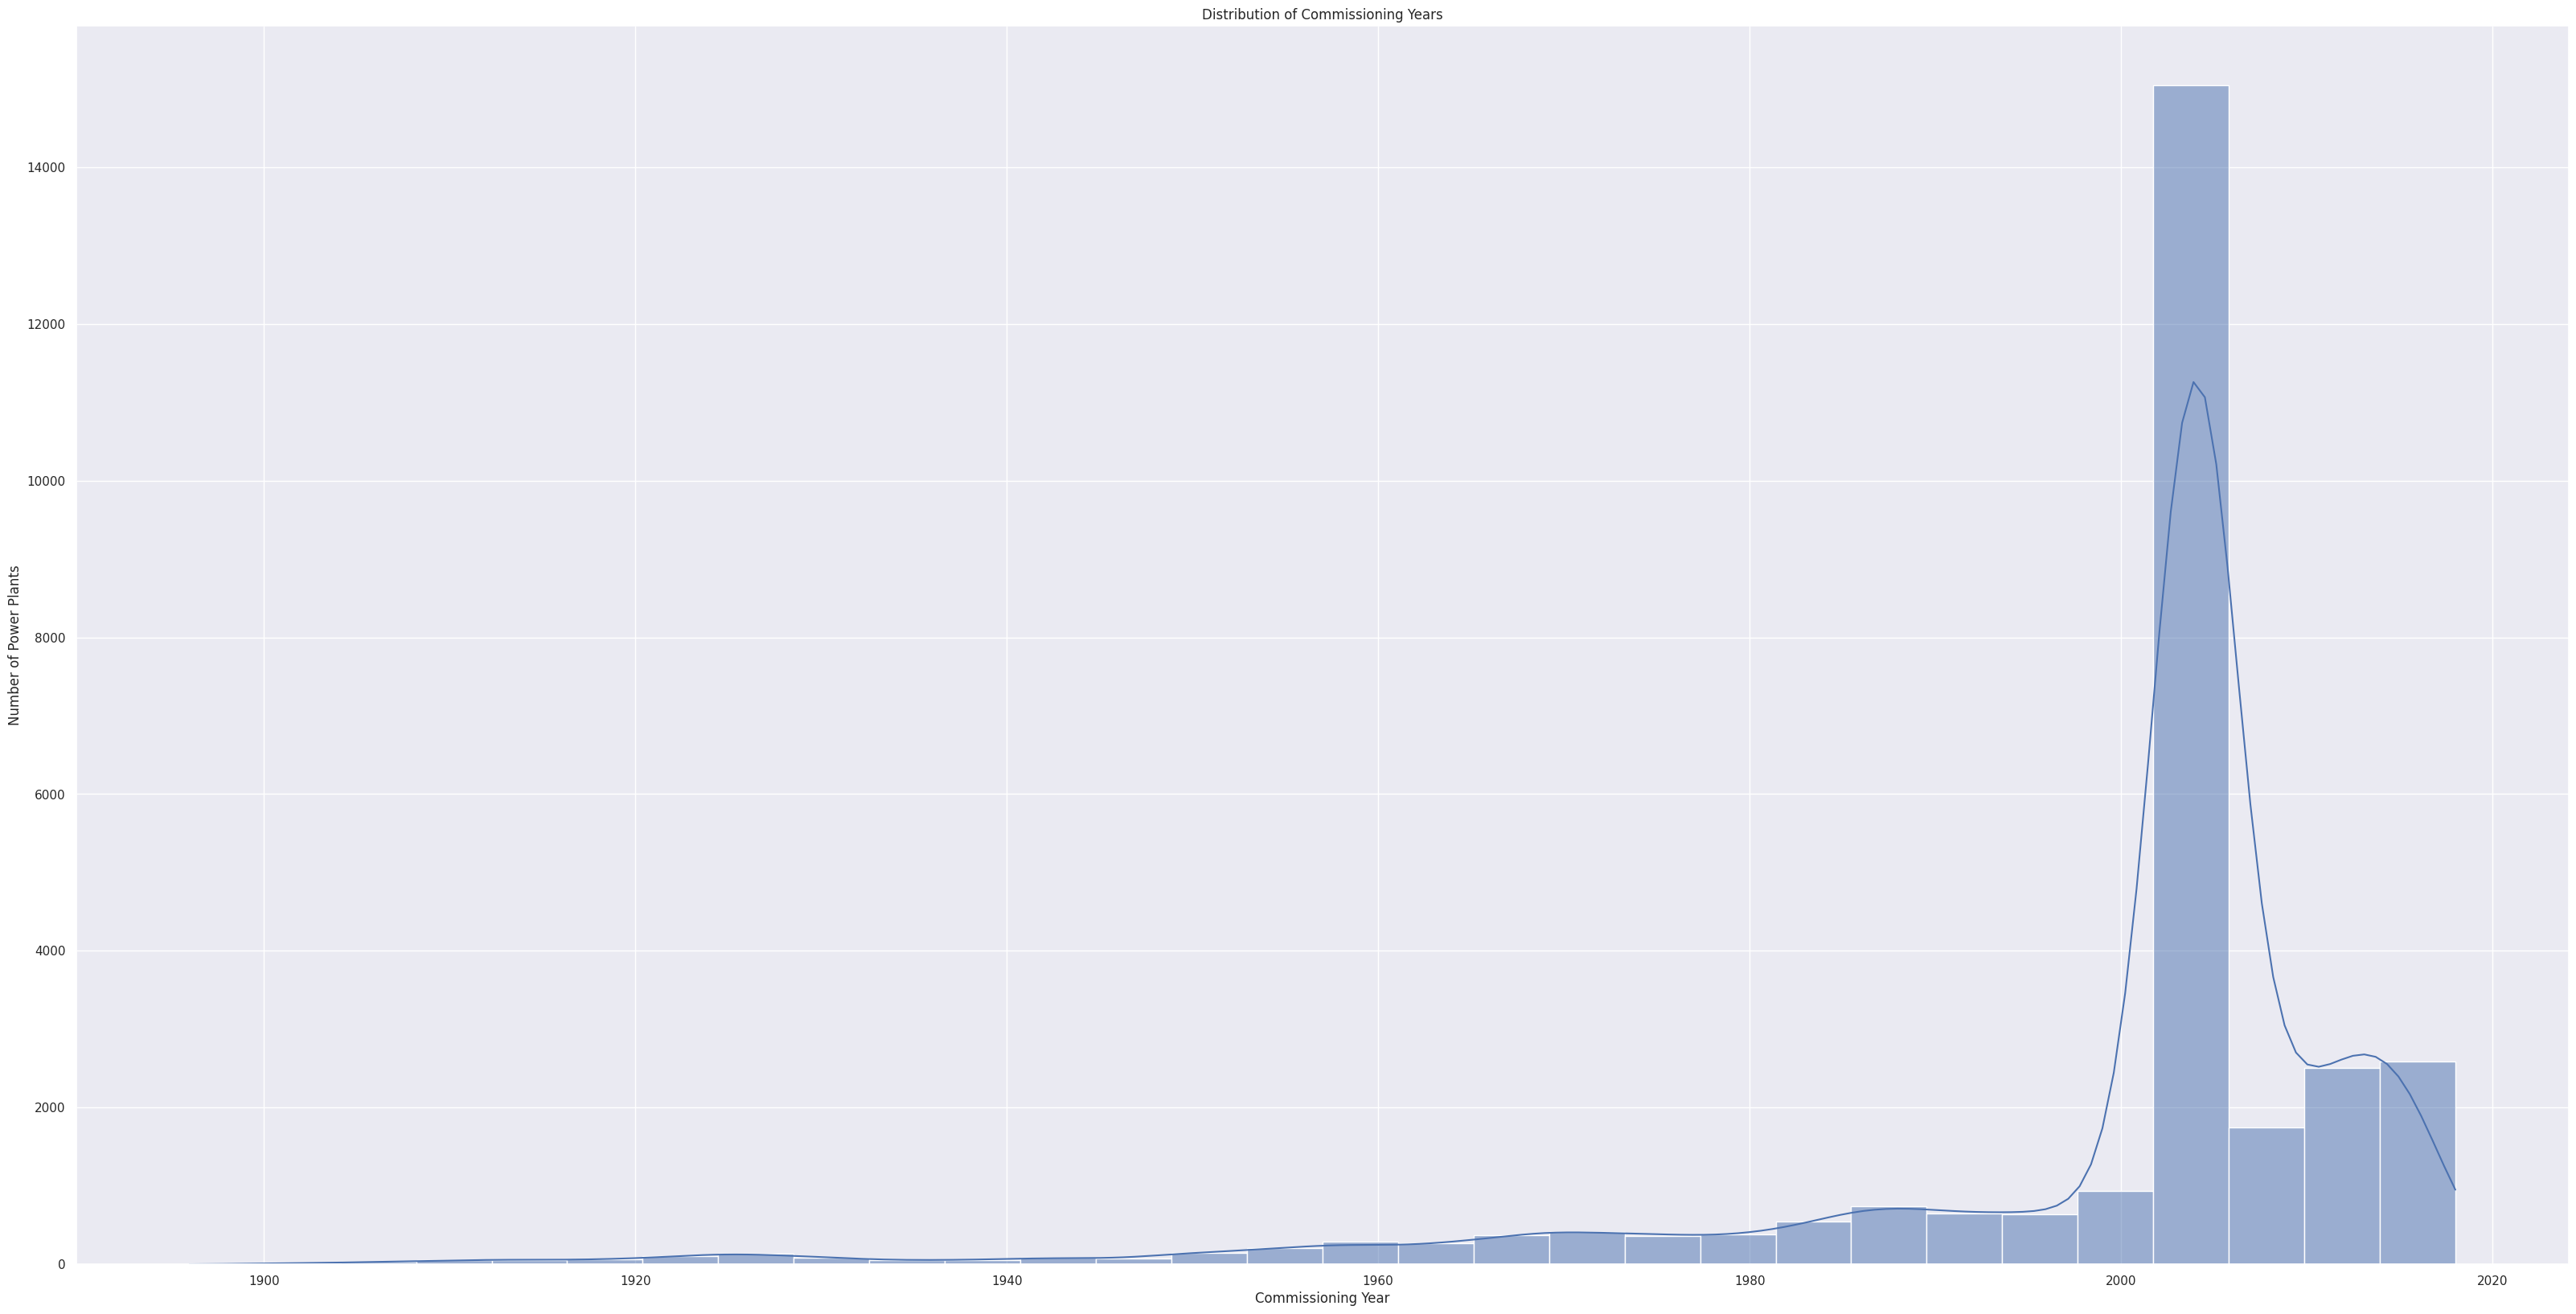

In [32]:
# Power plant capacity distribution by country
plt.figure(figsize=(40, 20))
sns.boxplot(x='country', y='capacity_mw', data=df)
plt.title('Power Plant Capacity Distribution by Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Capacity (MW)')
plt.show()

# Power plant capacity distribution by country (using stripplot for more detail)
plt.figure(figsize=(40, 20))
sns.stripplot(x='country', y='capacity_mw', data=df, jitter=0.3, alpha=0.5)  # jitter for better visualization
plt.title('Power Plant Capacity Distribution by Country (Stripplot)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Capacity (MW)')
plt.show()

# Distribution of capacity_mw for top 10 countries
top_10_countries = df['country'].value_counts().nlargest(10).index
top_10_df = df[df['country'].isin(top_10_countries)]

plt.figure(figsize=(40, 20))
sns.boxplot(x='country', y='capacity_mw', data=top_10_df)
plt.title('Capacity Distribution for Top 10 Countries')
plt.xticks(rotation=45)
plt.show()



# Convert 'commissioning_year' to datetime objects, handling potential errors
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce') # Convert to numeric, invalid values to NaN

plt.figure(figsize=(40, 20))
sns.histplot(df['commissioning_year'], bins=30, kde=True)
plt.title('Distribution of Commissioning Years')
plt.xlabel('Commissioning Year')
plt.ylabel('Number of Power Plants')
plt.show()


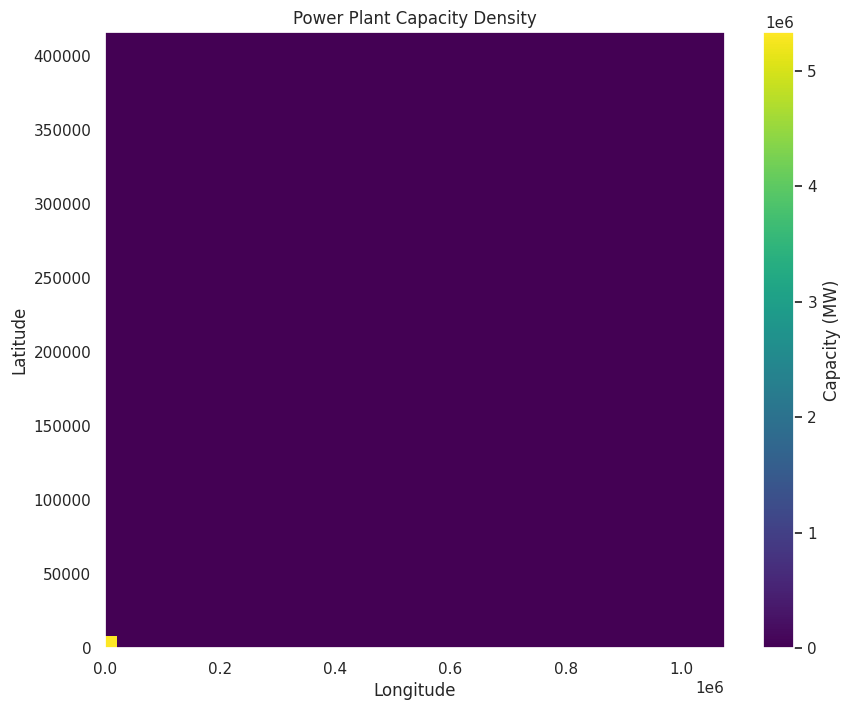

In [33]:
# Relationships between geographical location and other features
# Example: Capacity vs. Latitude/Longitude with a heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist2d(df['longitude'], df['latitude'], bins=(50, 50), weights=df['capacity_mw'], cmap='viridis')
plt.colorbar(label='Capacity (MW)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Power Plant Capacity Density')
plt.show()


# Another example:  Geographical distribution of different fuel types
import plotly.express as px

# Create a smaller sample for faster plotting (optional, remove if dataset is not too large)
sample_df = df.sample(frac=0.1)

fig = px.scatter_mapbox(sample_df, lat="latitude", lon="longitude", color="fuel1",
                        hover_name="name", hover_data=["capacity_mw"], zoom=2, height=600, width=800,
                       title="Geographical Distribution of Power Plants by Fuel Type")
fig.update_layout(mapbox_style="open-street-map")
fig.show()


# ... (Rest of your code)

--2024-12-01 20:01:23--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.195.201, 52.92.232.201, 52.218.237.243, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.195.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K   526KB/s    in 0.4s    

2024-12-01 20:01:24 (526 KB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries.prj  
  inflating: ne_110m_admin_0_countries.shp  
  inflating: ne_110m_admin_0_coun

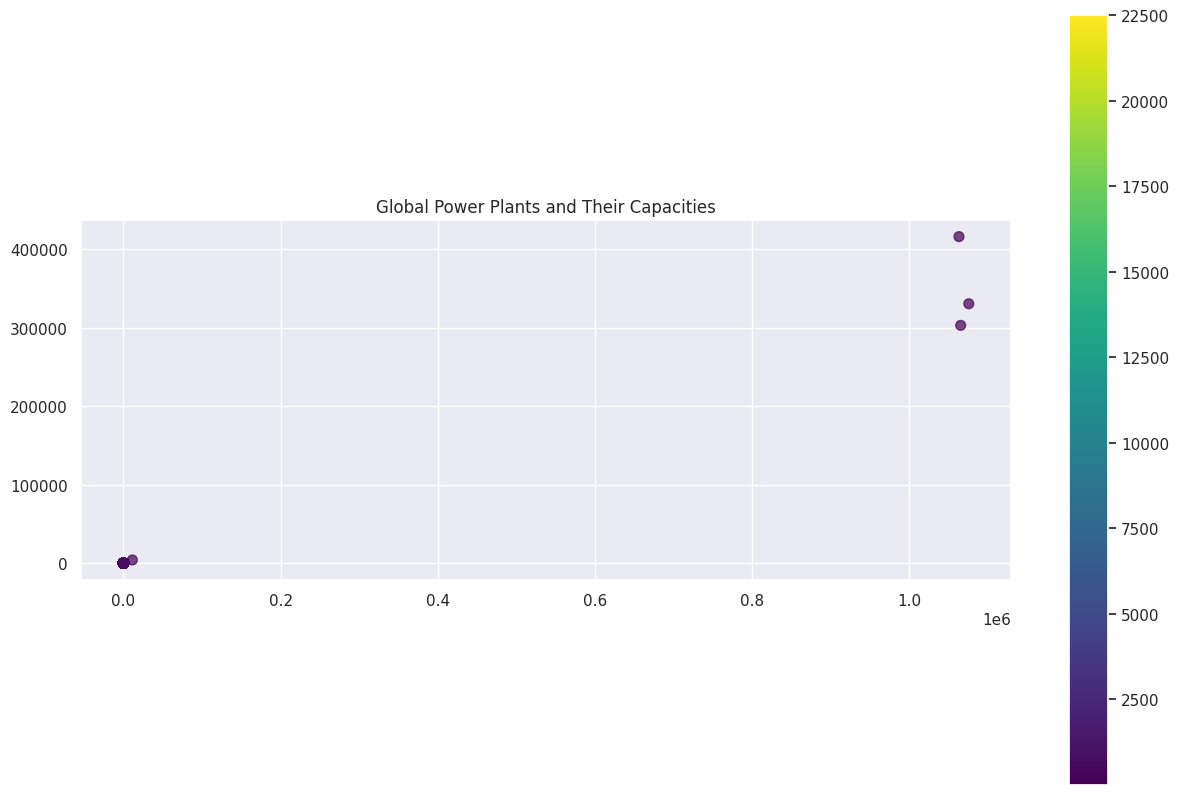

In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


# Using Geopandas for enhanced visualization
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip # Download the shapefile
!unzip ne_110m_admin_0_countries.zip # Unzip the downloaded file

world = gpd.read_file("ne_110m_admin_0_countries.shp") # Load the shapefile using geopandas
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(column='capacity_mw', ax=ax, legend=True, cmap='viridis', markersize=50, alpha=0.7)
plt.title('Global Power Plants and Their Capacities')
plt.show()

### Research Questions 1

What are the trends in the capacity and generation of power plants across countries over time?

This question will investigate how power capacity (capacity_mw) and estimated generation (estimated_generation_gwh) vary across countries and over years (commissioning_year, year_of_capacity_data).

Supported by:

Renewable energy literature emphasizes the role of geographical and economic factors in influencing capacity and generation trends. For example, Bazilian et al. (2013) highlight that policy and investment shape capacity growth across regions2.

In [35]:
pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


<ipython-input-36-d549215ffd01>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




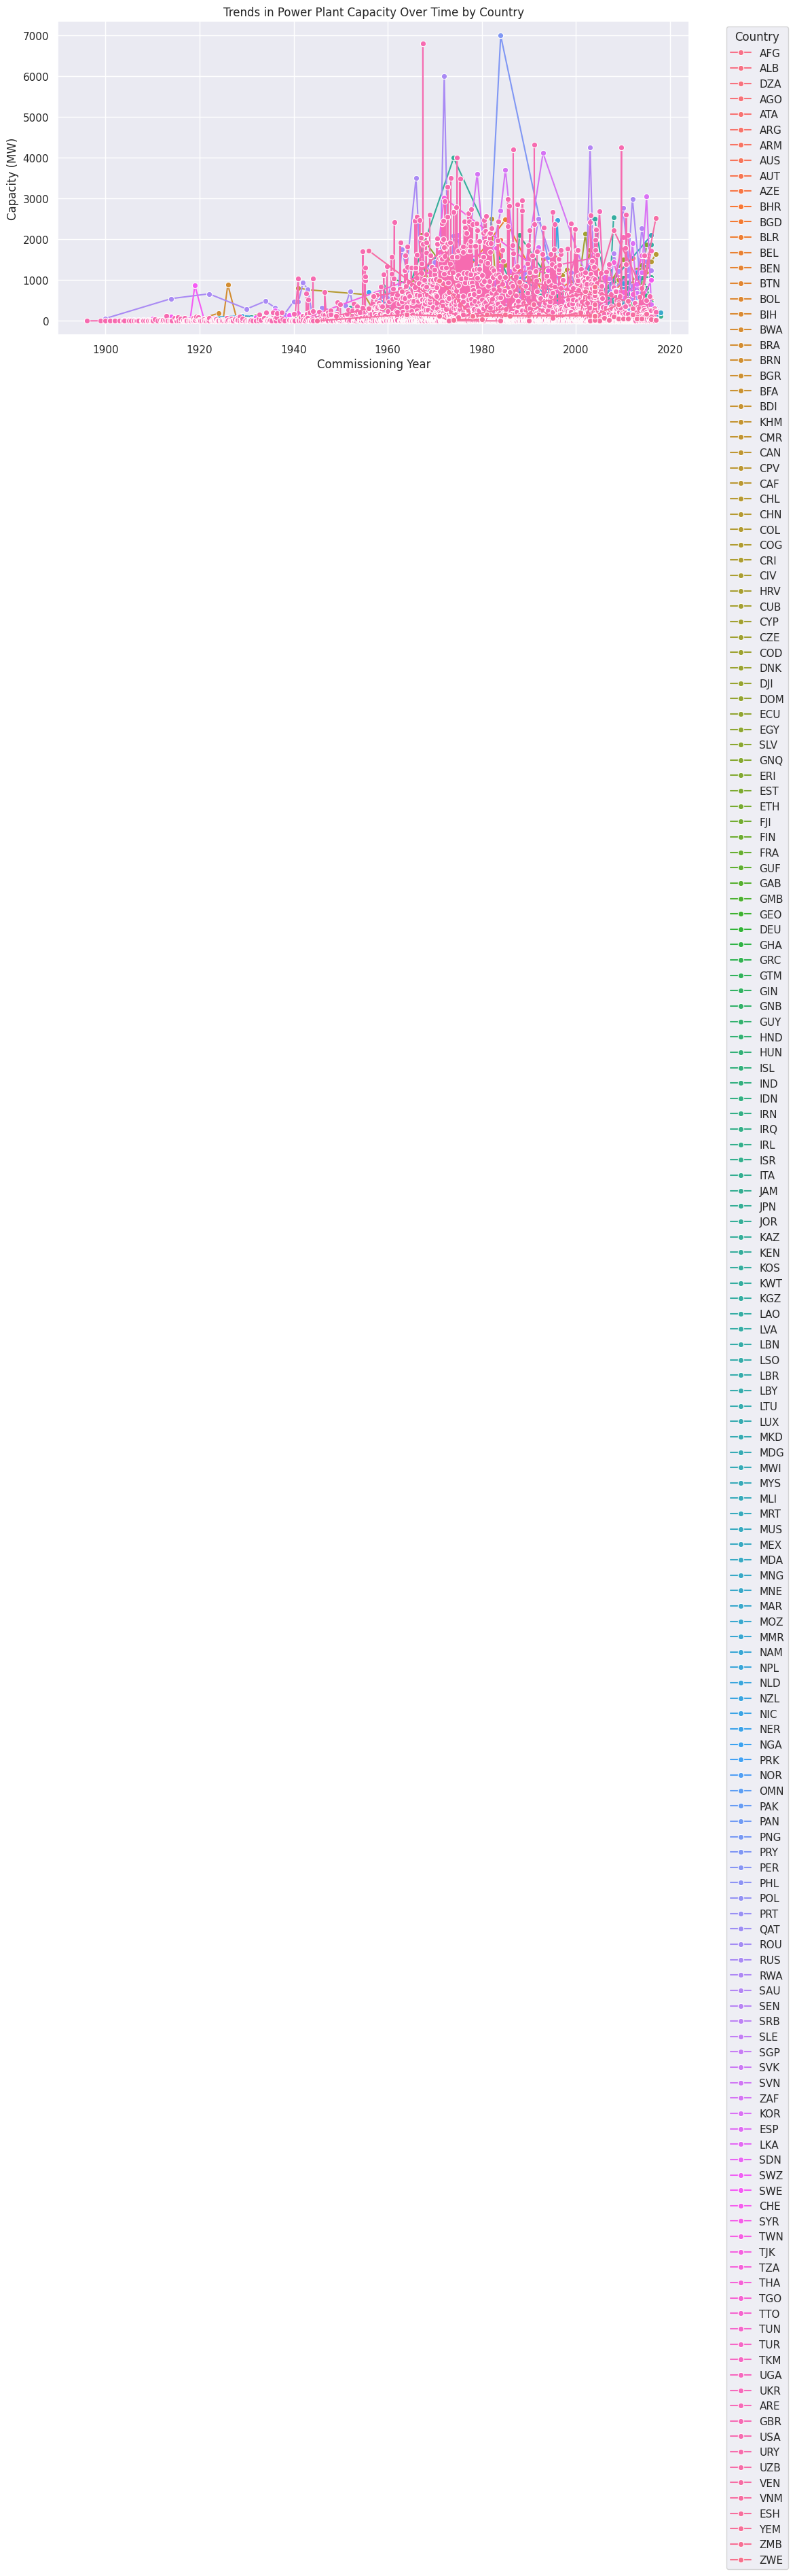

In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.basemap import Basemap


# 1. Trends in capacity and generation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='commissioning_year', y='capacity_mw', hue='country', marker='o', ci=None)
plt.title('Trends in Power Plant Capacity Over Time by Country')
plt.xlabel('Commissioning Year')
plt.ylabel('Capacity (MW)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()






### Research Questions 2

What is the relationship between fuel type and power generation?

This analysis will explore how different fuel types (fuel1, fuel2, fuel3, fuel4) contribute to power generation across regions.

Supported by:

Studies, such as that by Schlömer et al. (2014), identify fuel-specific efficiencies and their environmental impacts, suggesting trends in the transition from fossil fuels to renewable sources .


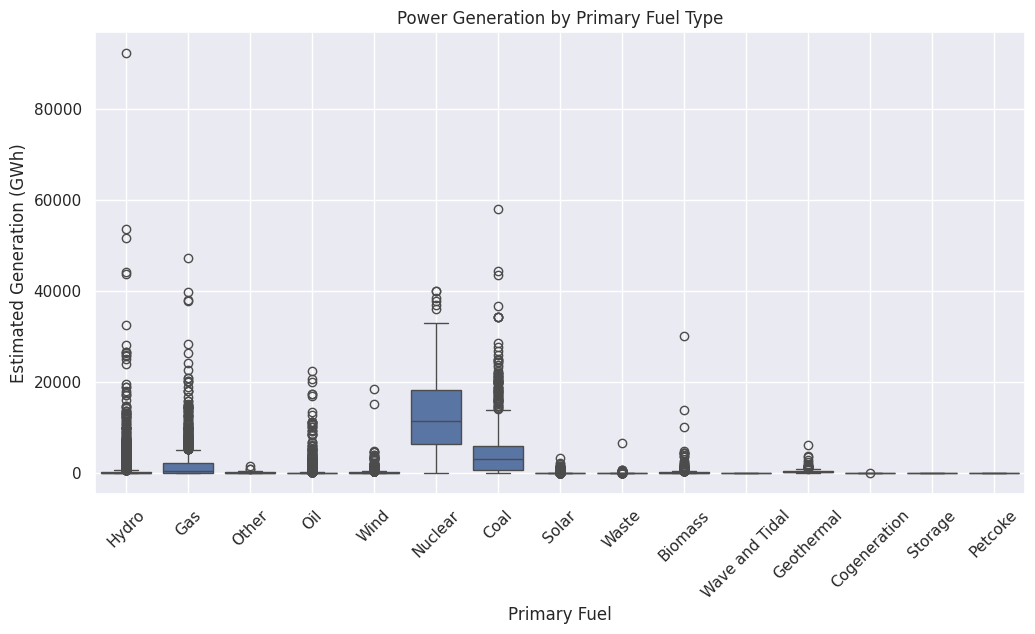

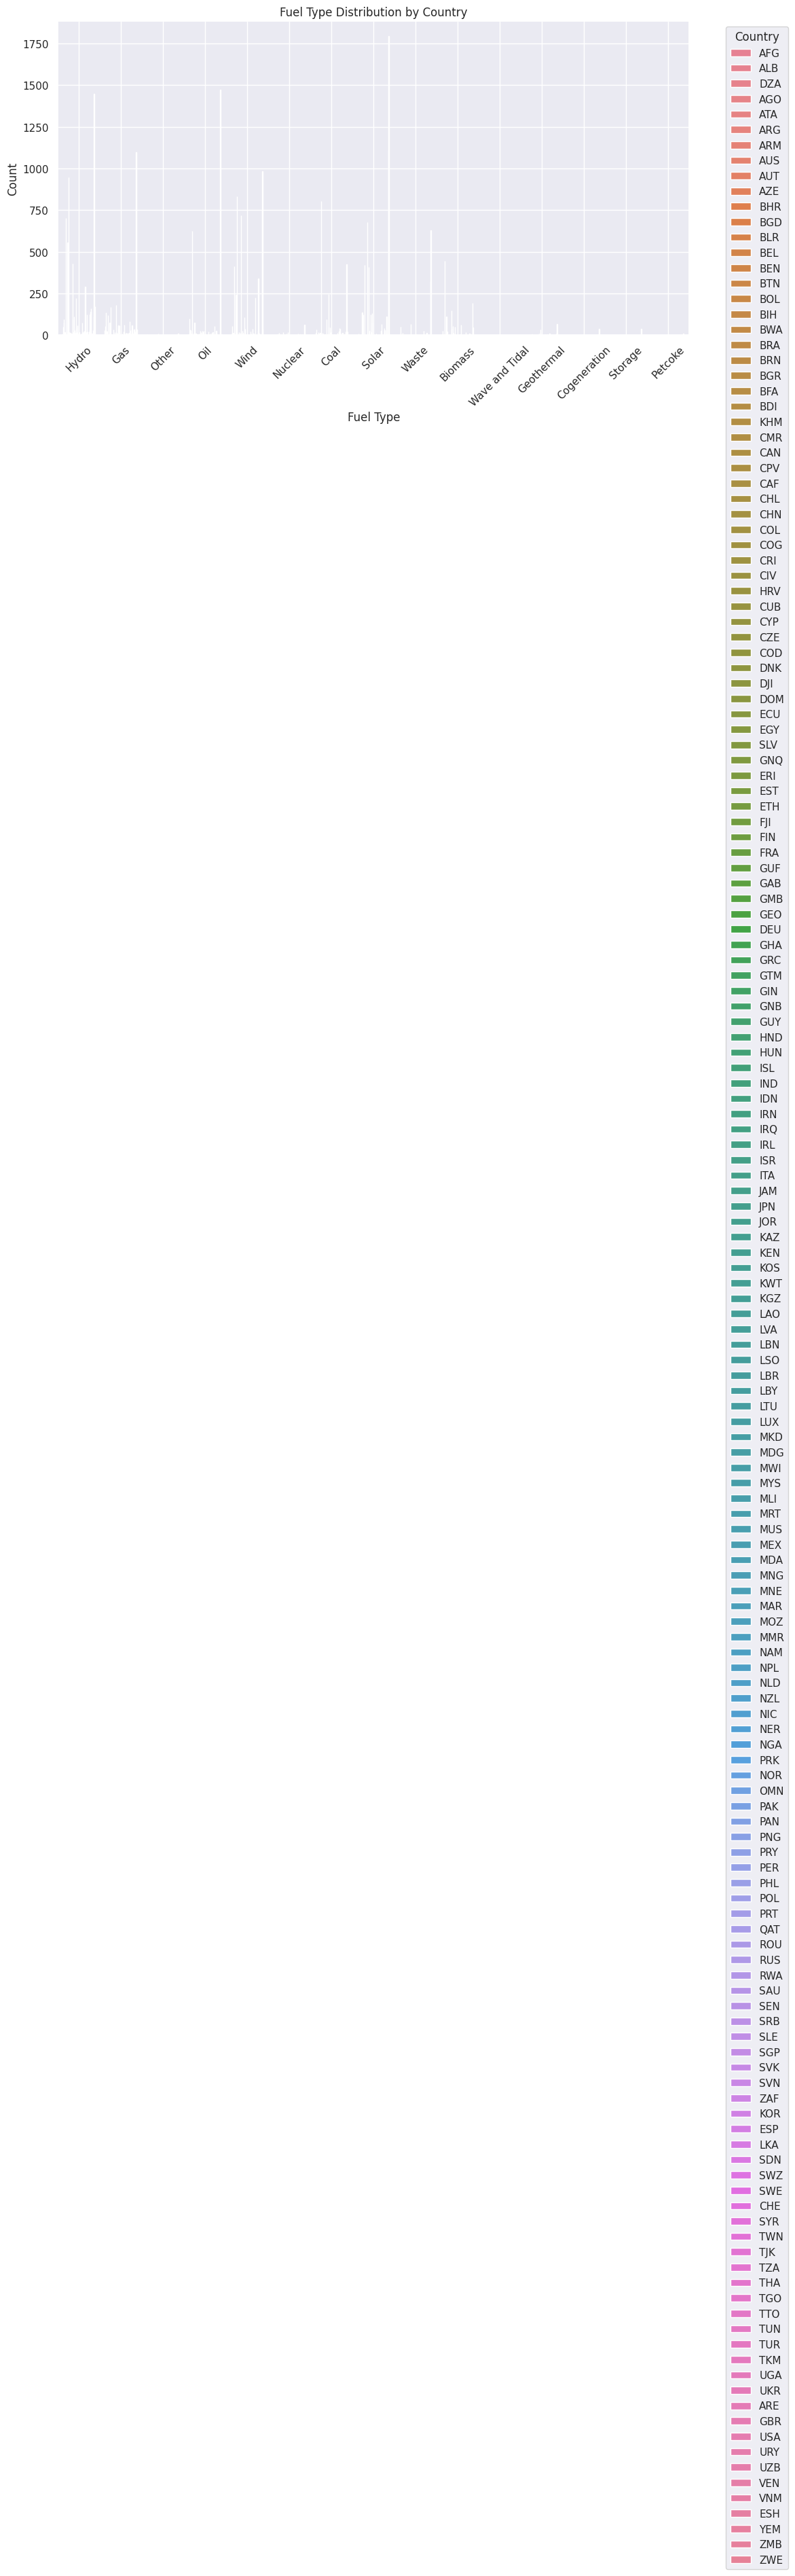

In [37]:
# 2. Relationship between fuel type and power generation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fuel1', y='estimated_generation_gwh')
plt.title('Power Generation by Primary Fuel Type')
plt.xlabel('Primary Fuel')
plt.ylabel('Estimated Generation (GWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='fuel1', hue='country')
plt.title('Fuel Type Distribution by Country')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



Are their spatial distributions of power plants and their capacities?

This question will analyze the geospatial distribution of power plants based on latitude, longitude, and capacity_mw to uncover regional trends and inequalities in power availability.

Supported by:

Studies like Sovacool (2011) emphasize the influence of geographic features on the location and size of power plants, often highlighting disparities in energy access in less developed regions .

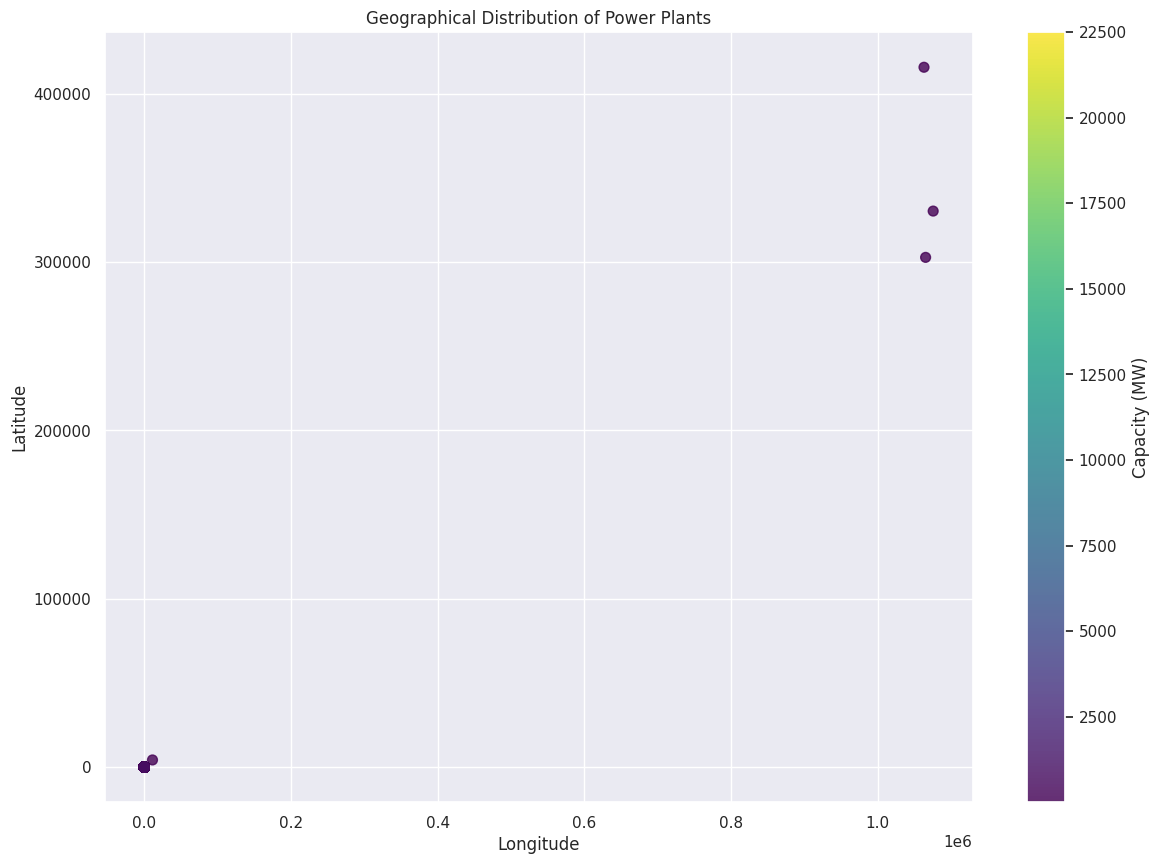

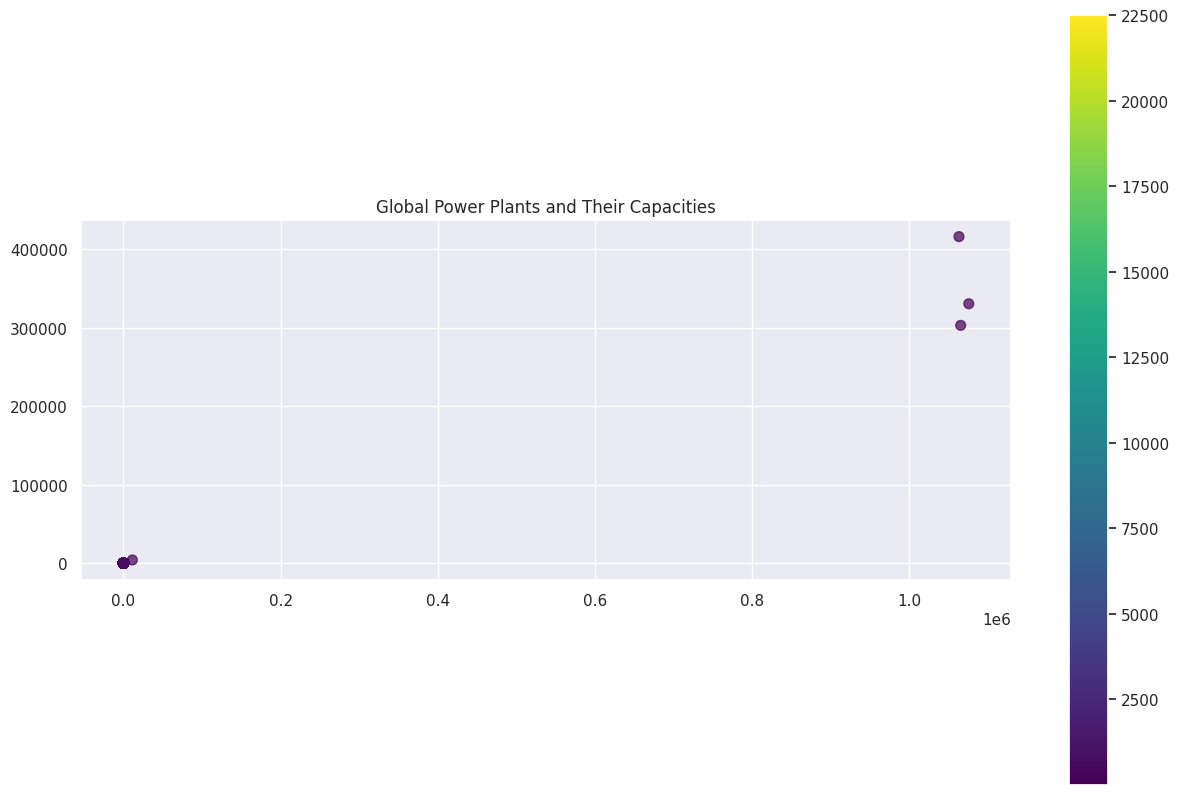

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 3. Spatial distributions of power plants
plt.figure(figsize=(14, 10))
plt.scatter(df['longitude'], df['latitude'], c=df['capacity_mw'], cmap='viridis', alpha=0.8, s=50)
plt.colorbar(label='Capacity (MW)')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Using Geopandas for enhanced visualization
# Download the Natural Earth dataset directly using the URL
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip") # Changed this line to use the direct download URL
geo_df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
geo_df.plot(column='capacity_mw', ax=ax, legend=True, cmap='viridis', markersize=50, alpha=0.7)
plt.title('Global Power Plants and Their Capacities')
plt.show()

### References
Bazilian, M., Rogner, H., Howells, M., Hermann, S., Arent, D., Gielen, D., et al. (2013). Energy and technology transitions for power systems. Annual Review of Environment and Resources, 38(1), 217-247.

Schlömer, S., Bruckner, T., Fulton, L., Hertwich, E., McKinnon, A., Perczyk, D., et al. (2014). IPCC Fifth Assessment Report, Chapter on Transport.

Sovacool, B. K. (2011). The geography of energy and equity. Renewable and Sustainable Energy Reviews, 15(5), 2801–2814.